# 1. Import libraries & import libraries

In [1]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

In [3]:
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
df=pd.read_csv('E:/DS/craigslist-used car raw data/vehicles.csv')

# 2. Data cleaning
## 2.1 check the information

In [5]:
df.shape

(509577, 25)

In [6]:
df.head(5)

id                                                url  \
0  7034441763  https://saltlakecity.craigslist.org/cto/d/salt...   
1  7034440610  https://saltlakecity.craigslist.org/ctd/d/sand...   
2  7034440588  https://saltlakecity.craigslist.org/ctd/d/sand...   
3  7034440546  https://saltlakecity.craigslist.org/ctd/d/sand...   
4  7034406932  https://saltlakecity.craigslist.org/ctd/d/evan...   

           region                           region_url  price    year  \
0  salt lake city  https://saltlakecity.craigslist.org  17899  2012.0   
1  salt lake city  https://saltlakecity.craigslist.org      0  2016.0   
2  salt lake city  https://saltlakecity.craigslist.org  46463  2015.0   
3  salt lake city  https://saltlakecity.craigslist.org      0  2016.0   
4  salt lake city  https://saltlakecity.craigslist.org  49999  2018.0   

  manufacturer        model  condition    cylinders  ... drive     size  \
0   volkswagen       golf r  excellent  4 cylinders  ...   4wd  compact   
1         ford        f-150  excellent          NaN  ...   4wd      NaN   
2          gmc  sierra 1500  excellent          NaN  ...   4wd      NaN   
3         ford        f-150  excellent          NaN  ...   4wd      NaN   
4         ford        f-450        NaN          NaN  ...   4wd      NaN   

        type paint_color                                          image_url  \
0  hatchback       black  https://images.craigslist.org/00G0G_fTLDWM5Xyv...   
1        NaN         NaN  https://images.craigslist.org/00v0v_7Cu0buIofU...   
2        NaN       white  https://images.craigslist.org/01515_lPvJ9bfbdY...   
3        NaN         NaN  https://images.craigslist.org/00T0T_6Rjfp3NS4O...   
4     pickup       white  https://images.craigslist.org/00W0W_8yIUwRBXXd...   

                                         description county state      lat  \
0  PRICE REDUCED!   -Garage kept -Low Miles (63K)...    NaN    ut  40.7372   
1  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
2  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
3  Drive it home today. Call (Or Text) us now !!C...    NaN    ut  40.5881   
4  2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...    NaN    ut  40.3744   

      long  
0 -111.858  
1 -111.884  
2 -111.884  
3 -111.884  
4 -104.694  

[5 rows x 25 columns]

In [7]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            509577 non-null  int64  
 1   url           509577 non-null  object 
 2   region        509577 non-null  object 
 3   region_url    509577 non-null  object 
 4   price         509577 non-null  int64  
 5   year          508050 non-null  float64
 6   manufacturer  486813 non-null  object 
 7   model         501588 non-null  object 
 8   condition     277643 non-null  object 
 9   cylinders     309894 non-null  object 
 10  fuel          505592 non-null  object 
 11  odometer      417253 non-null  float64
 12  title_status  506515 non-null  object 
 13  transmission  505858 non-null  object 
 14  vin           302152 non-null  object 
 15  drive         365434 non-null  object 
 16  size          167574 non-null  object 
 17  type          368046 non-null  object 
 18  pain

## 2.2 Drop the unnecessary columns
In this part I drop the columns. There are mainly two reasons for that. Firstly some columns are not really useful for my next work. Secondly some columns have a big proportion of missing data.

In [8]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

## 2.3 Deal with missing data

In [9]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [10]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [11]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [12]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

In [13]:
#change the 'year' type into int
df['year']=df['year'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            509577 non-null  int64  
 1   region        509577 non-null  object 
 2   price         509577 non-null  int64  
 3   year          509577 non-null  int32  
 4   manufacturer  509577 non-null  object 
 5   model         509577 non-null  object 
 6   condition     509577 non-null  object 
 7   odometer      509577 non-null  float64
 8   title_status  509577 non-null  object 
 9   transmission  509577 non-null  object 
 10  drive         509577 non-null  object 
 11  paint_color   509577 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 44.7+ MB


## 2.4 Drop the outliers
Outliers are unusual values in dataset, and they can distort statistical analyses and violate their assumptions. In this project I decided to use IQR and boxplot to detect and delete the outliers

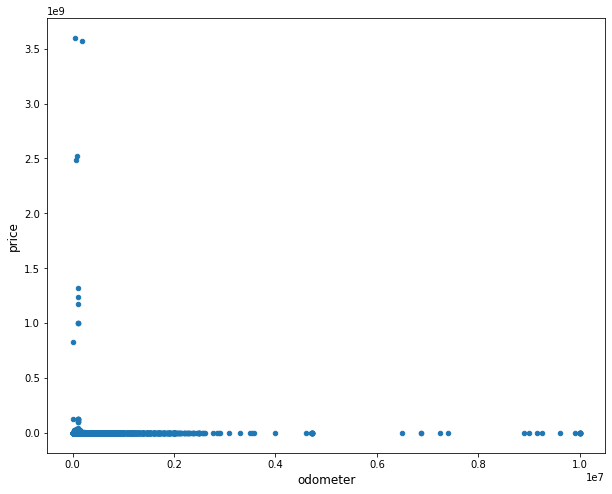

In [15]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price',figsize=(10, 8))

In [16]:
df['price'].max()

3600028900

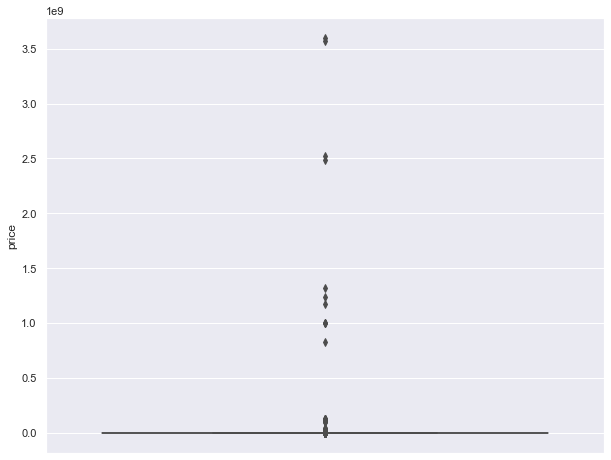

In [17]:
#detecting outlier by box chart
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot( y='price', data=df)

In [18]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(df['price'])
iqr

13960.0

In [19]:
price_stats=df['price'].describe()
price_stats

count    5.095770e+05
mean     5.479684e+04
std      9.575025e+06
min      0.000000e+00
25%      3.995000e+03
50%      9.377000e+03
75%      1.795500e+04
max      3.600029e+09
Name: price, dtype: float64

In [20]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

38895.0
-16945.0


In [21]:
outlier_above=[n for n in df['price'].values if n>upper_bound]

In [22]:
#delete outliers
clean_data=df[~df['price'].isin(outlier_above)]

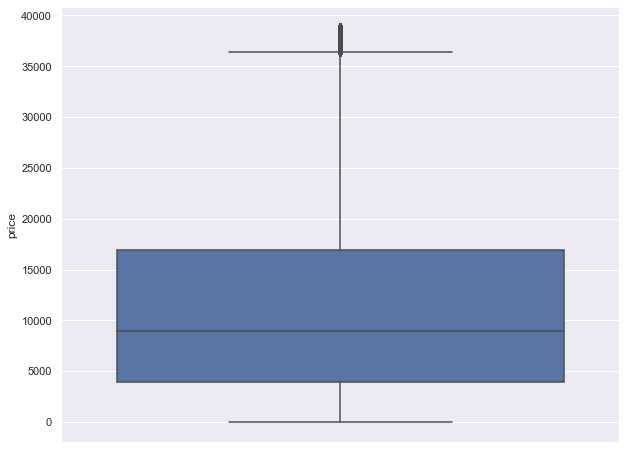

In [23]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot( y='price', data=clean_data)

## 2.5 Add some new features
To help with the follwing EDA work , I add three new columns 'odometer_class', 'price_class' and 'age', they may not be helpful for the prediction work, but can help me to analysis and understand the data directly.

In [24]:
#devide the odometer into three classes
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())//3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [25]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

3333333.0
3333333.0
6666666.0
9999999.0
<bound method Series.min of 0          63500.0
1             10.0
3             10.0
5         120057.0
6          95484.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 493188, dtype: float64>


In [26]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
clean_data[['odometer_class','odometer','price']].head(10)

odometer_class  odometer  price
0    low odometer   63500.0  17899
1    low odometer      10.0      0
3    low odometer      10.0      0
5    low odometer  120057.0  13999
6    low odometer   95484.0  34500
7    low odometer   89340.0  14500
8    low odometer  226031.0  12500
9    low odometer  128153.0  34500
10   low odometer  168838.0   5900
11   low odometer  156385.0  16500

In [28]:
#devide the price into three levels
price_div=(clean_data['price'].max()-clean_data['price'].min())//3
price_class1=clean_data['price'].min()+price_div
price_class2=price_class1+price_div
price_class3=price_class2+price_div

In [29]:
print(clean_data['price'].max())
print(clean_data['price'].min())
print(price_div)
print(price_class1)
print(price_class2)
print(price_class3)


38895
0
12965
12965
25930
38895


In [30]:
def price_class(n):
    if n<price_class1:
        return 'low price'
    if n>price_class1 and n<price_class2:
        return'medium price'
    else:
        return'high price'
clean_data['price_class']=clean_data['price'].apply(price_class)

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
clean_data['age']=2020-clean_data['year']

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
clean_data.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city      0  2016         ford    f-150  excellent   
3  7034440546  salt lake city      0  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

   odometer title_status transmission drive paint_color odometer_class  \
0   63500.0        clean       manual   4wd       black   low odometer   
1      10.0        clean    automatic   4wd     unknown   low odometer   
3      10.0        clean    automatic   4wd     unknown   low odometer   
5  120057.0        clean    automatic   4wd      silver   low odometer   
6   95484.0        clean    automatic   4wd       white   low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

In [33]:
clean_data.shape

(493188, 15)

# 3.visualization

In [34]:
clean_data.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city      0  2016         ford    f-150  excellent   
3  7034440546  salt lake city      0  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

   odometer title_status transmission drive paint_color odometer_class  \
0   63500.0        clean       manual   4wd       black   low odometer   
1      10.0        clean    automatic   4wd     unknown   low odometer   
3      10.0        clean    automatic   4wd     unknown   low odometer   
5  120057.0        clean    automatic   4wd      silver   low odometer   
6   95484.0        clean    automatic   4wd       white   low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

## all manufacturers during the whole period
### year count

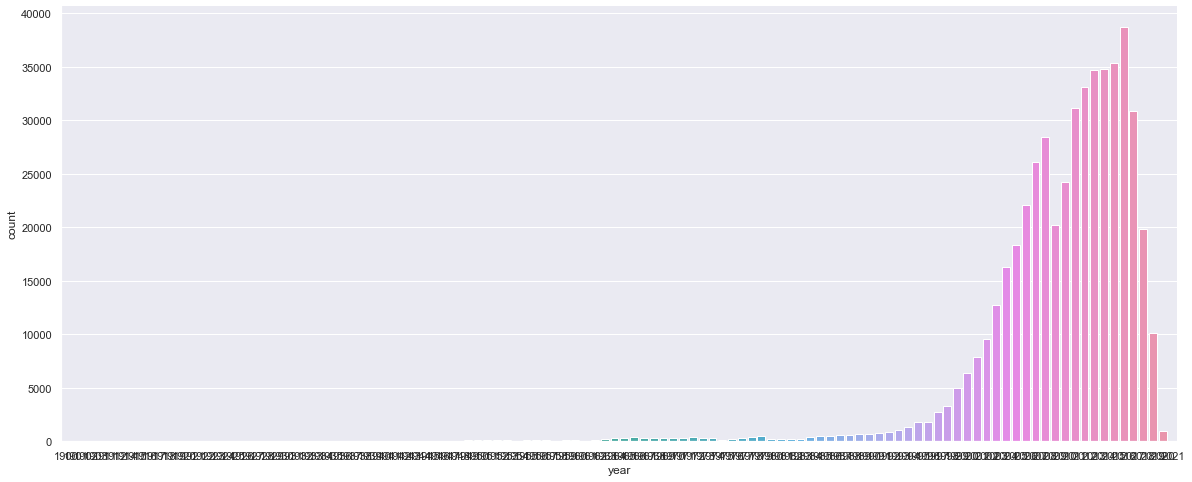

In [35]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1)
sns.countplot(x='year',data=clean_data)
sns.despine()

### average odometer of each manufacturer 

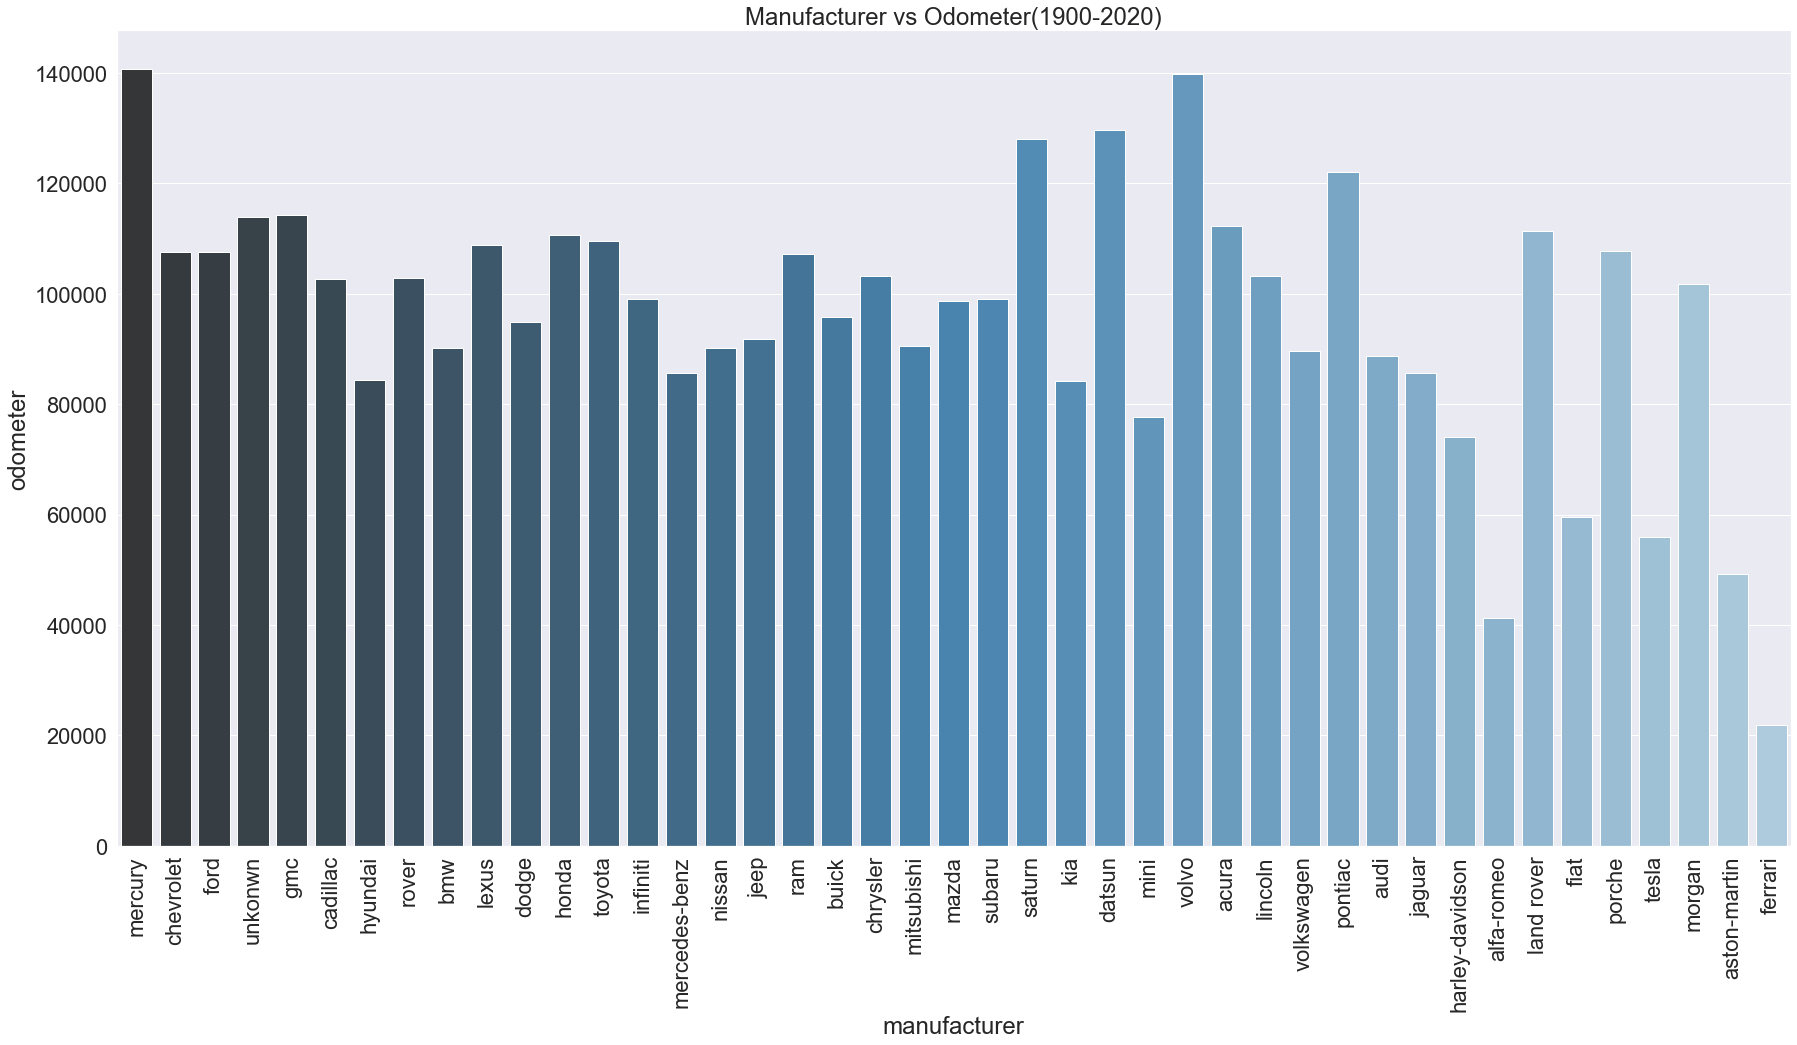

In [36]:
odometer_manufacturer=clean_data.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(30,15))
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.title('Manufacturer vs Odometer(1900-2020)')
sns.barplot(x=odometer_manufacturer.manufacturer, palette="Blues_d",y=odometer_manufacturer.odometer,ci=None)
plt.show()


From the bar chart we could know that **Saturn** have the most miles when they are on second-hand sale.

### average price of each manufacturer  

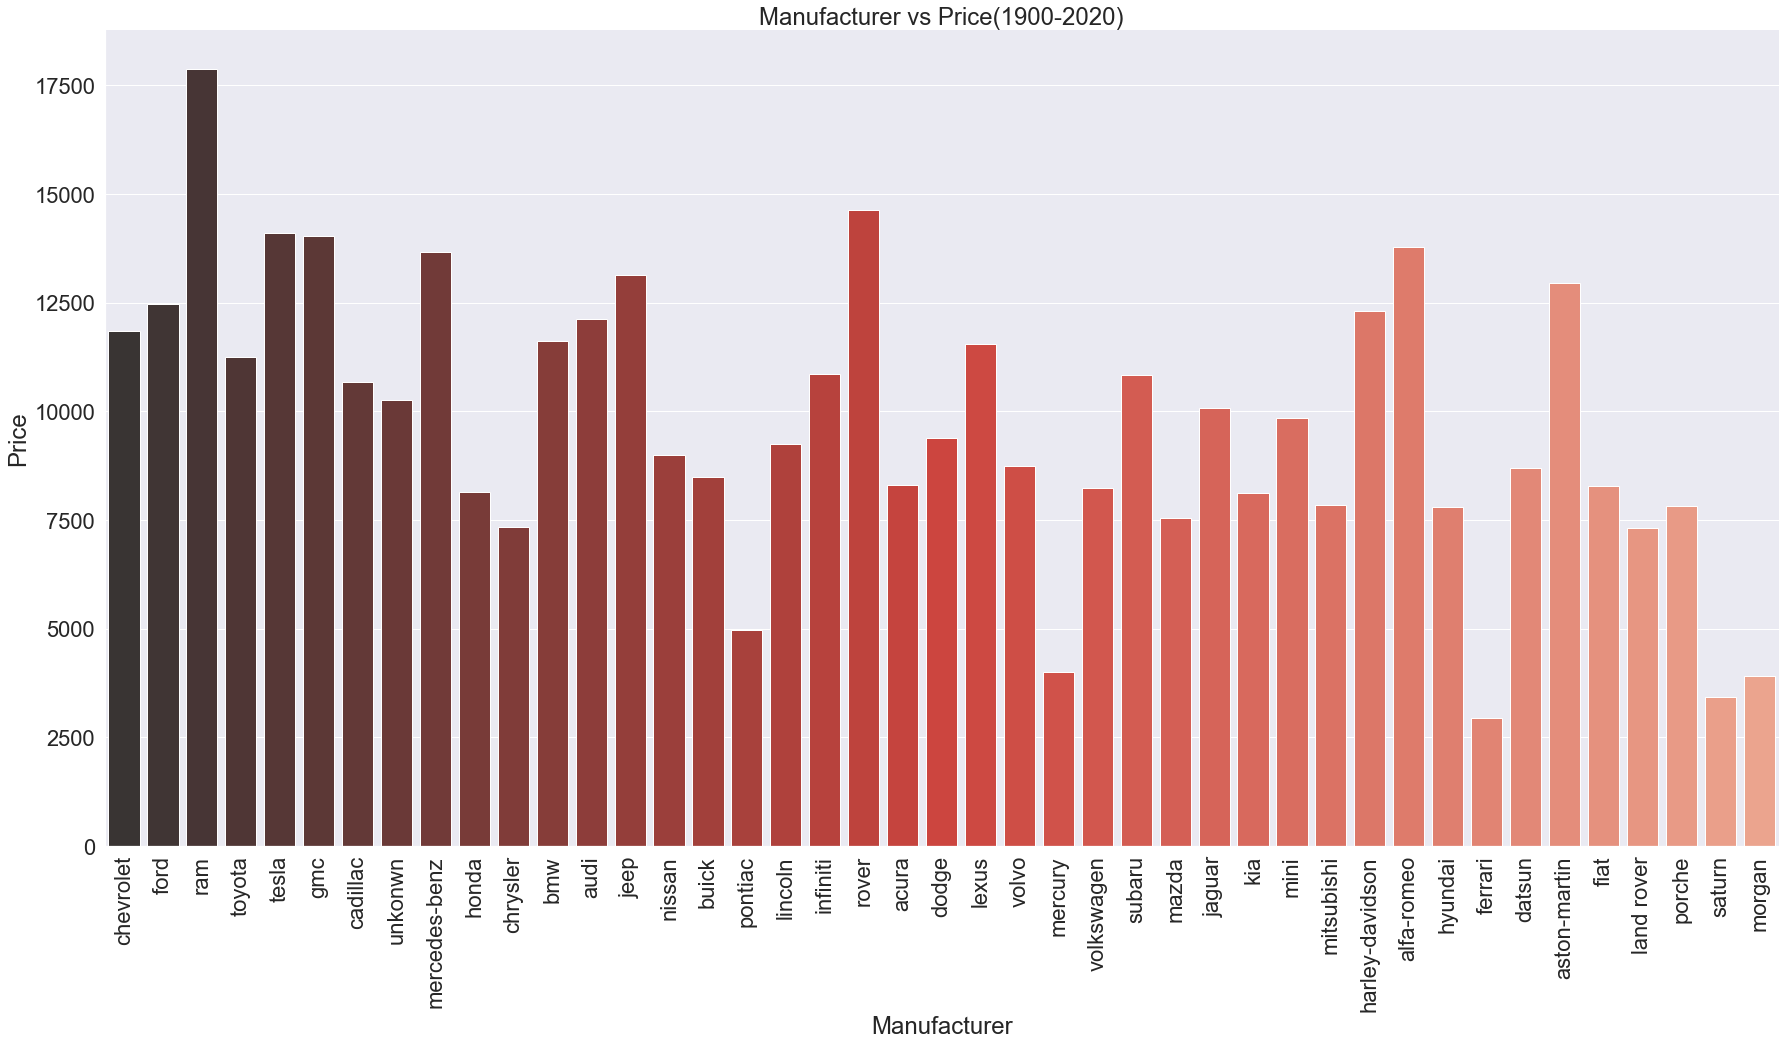

In [37]:
price_manufacturer=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=price_manufacturer.manufacturer, palette="Reds_d",y=price_manufacturer.price,ci=None)
sns.despine()
sns.set(font_scale=2)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Manufacturer vs Price(1900-2020)')
plt.show()

We could know that among used cars, **ram** usually has the average highest price.

### condition and Price

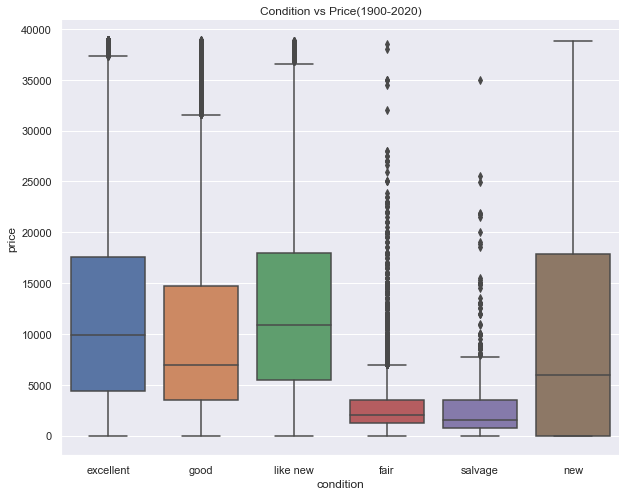

In [38]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.boxplot(x='condition',y='price',data=clean_data)
sns.despine()

plt.title('Condition vs Price(1900-2020)')
plt.show()

In [39]:
allcondition=clean_data.groupby('condition').price_class.value_counts(normalize=True)
allcondition

condition  price_class 
excellent  low price       0.607765
           medium price    0.287935
           high price      0.104300
fair       low price       0.980504
           medium price    0.017694
           high price      0.001801
good       low price       0.703256
           medium price    0.243236
           high price      0.053507
like new   low price       0.573293
           medium price    0.308852
           high price      0.117855
new        low price       0.670618
           medium price    0.210838
           high price      0.118544
salvage    low price       0.960584
           medium price    0.037956
           high price      0.001460
Name: price_class, dtype: float64

Text(0.5, 1.0, 'Condition vs Price Class(1900-2020)')

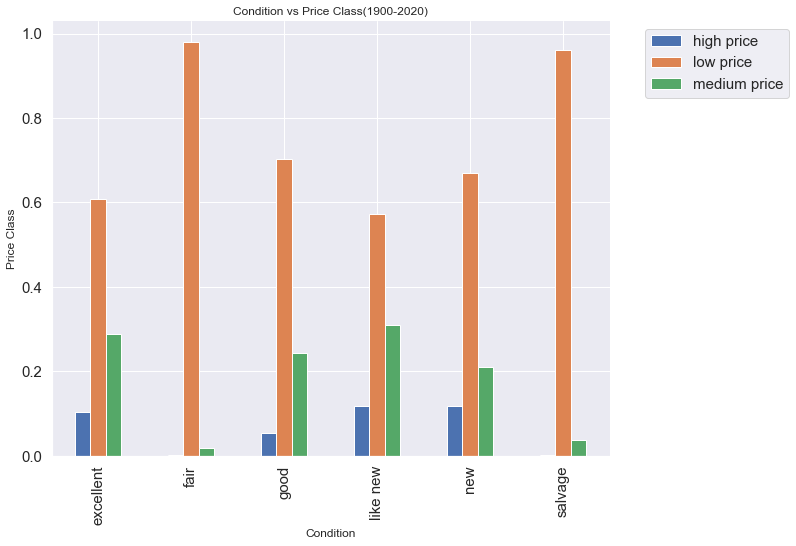

In [40]:
_=allcondition.unstack().plot(kind='bar',figsize=(10, 8),stacked=False,fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)
sns.despine()
sns.set(font_scale=1)
plt.xlabel('Condition')
plt.ylabel('Price Class')
plt.title('Condition vs Price Class(1900-2020)')

### Drive and Price

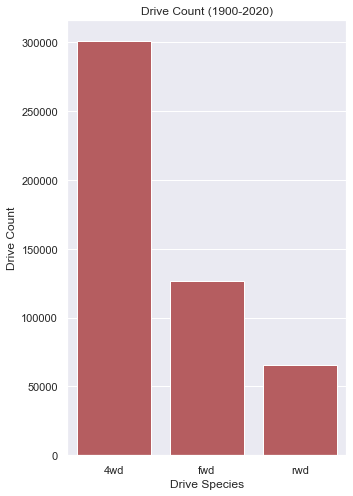

In [41]:
#Drive count
plt.figure(figsize=(5,8))
sns.countplot(x='drive',data=clean_data,color='r',order = clean_data['drive'].value_counts().index)
plt.xlabel('Drive Species')
plt.ylabel('Drive Count')
plt.title('Drive Count (1900-2020)')
plt.show()

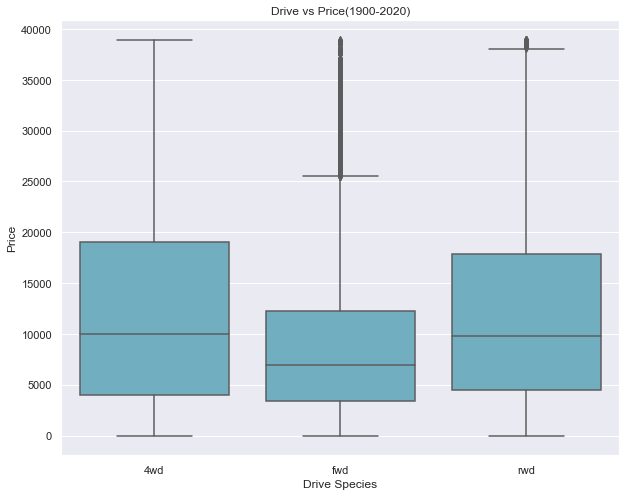

In [42]:
#Drive Species and Price
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
sns.despine()
sns.boxplot(x='drive',y='price',data=clean_data,color='c')
plt.xlabel('Drive Species')
plt.ylabel('Price')
plt.title('Drive vs Price(1900-2020)')
plt.show()

### color  and Price

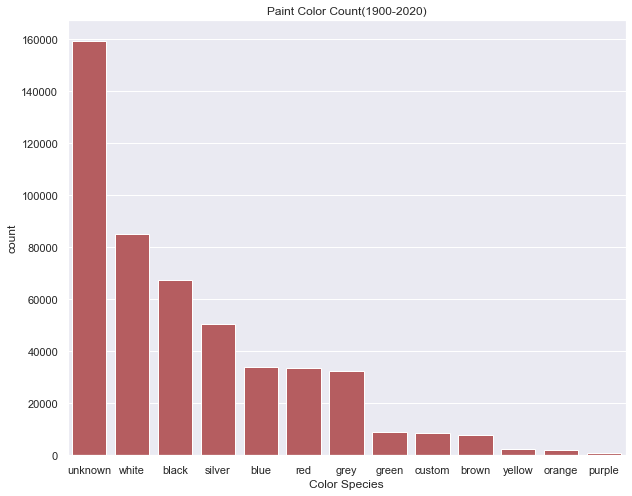

In [43]:
#Color count
plt.figure(figsize=(10,8)) 
sns.set(font_scale=1)
sns.despine()
sns.countplot(x='paint_color',data=clean_data,color='r',order = clean_data['paint_color'].value_counts().index)
plt.xlabel('Color Species')
plt.title('Paint Color Count(1900-2020)')
plt.show()



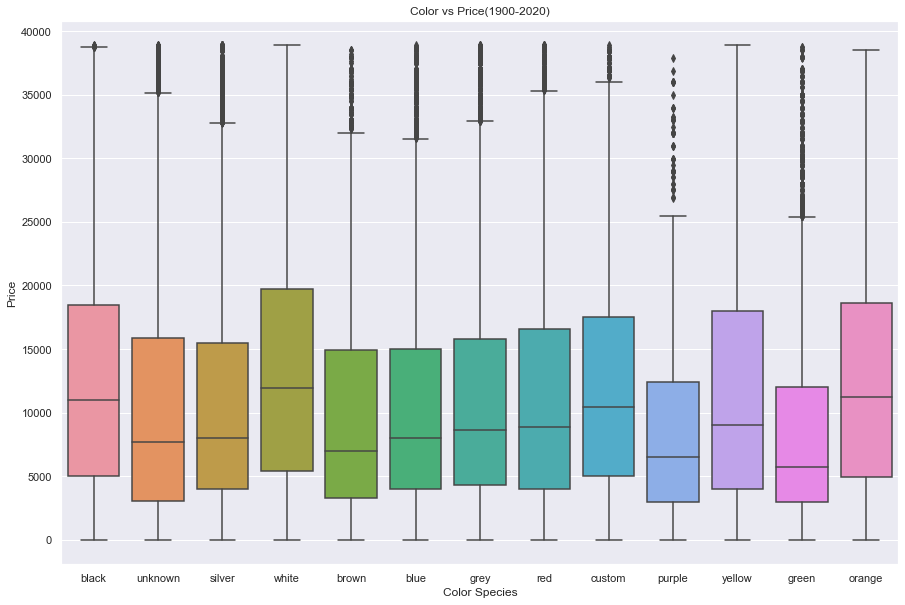

In [44]:
#Color count
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.despine()
sns.boxplot(x='paint_color',y='price',data=clean_data)
plt.xlabel('Color Species')
plt.ylabel('Price')
plt.title('Color vs Price(1900-2020)')
plt.show()

### relationship between price class and color

In [45]:
allcolor=clean_data.groupby('paint_color').price_class.value_counts(normalize=True)
allcolor

paint_color  price_class 
black        low price       0.565578
             medium price    0.322009
             high price      0.112413
blue         low price       0.682352
             medium price    0.254172
             high price      0.063477
brown        low price       0.704043
             medium price    0.222687
             high price      0.073270
custom       low price       0.594778
             medium price    0.308834
             high price      0.096388
green        low price       0.775353
             medium price    0.179563
             high price      0.045084
grey         low price       0.664885
             medium price    0.256795
             high price      0.078319
orange       low price       0.549096
             medium price    0.354177
             high price      0.096727
purple       low price       0.759804
             medium price    0.175245
             high price      0.064951
red          low price       0.640815
             medium pric

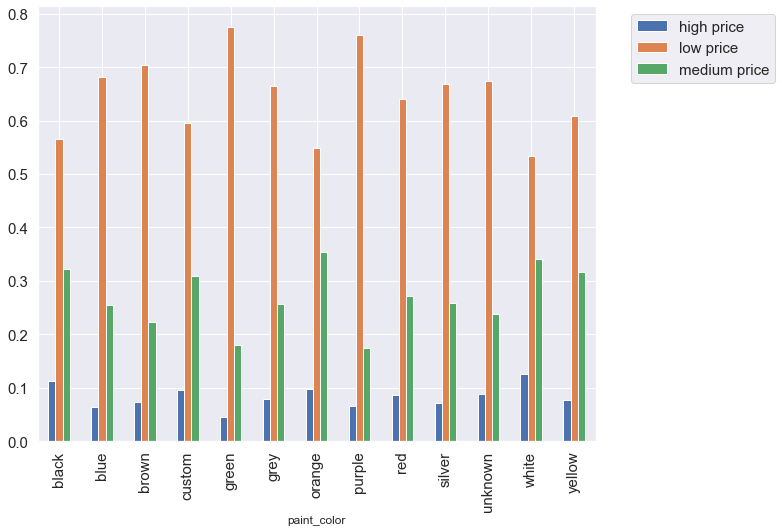

In [46]:
_=allcolor.unstack().plot(kind='bar',figsize=(10, 8),fontsize= 15)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)


# all manufacturers of the past 20 years
### average price trend of  the past 20 years

In [47]:
all_20=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
all_20_price=all_20.groupby('year').price.mean()

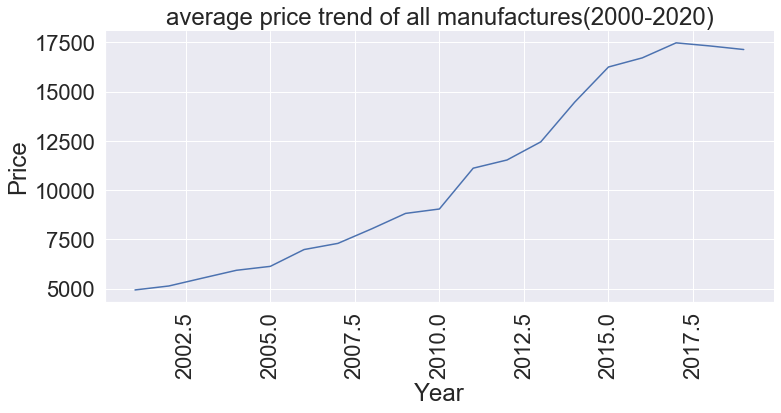

In [48]:
#the price trend
plt.figure(figsize=(12,5))
sns.set(font_scale=2)
sns.lineplot(data=all_20_price, ci=None)
sns.despine()
plt.title('average price trend of all manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


# popular manufacturers Top 5 in the past 20 years
### price trend 

In [49]:
#get the the most popolar 5 manufacturers 
#the 5 most popular manufacturer in uesed car market are 'ford','chevrolet','toyota','nissan','honda'
twenty_year=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
twenty_year['manufacturer'].value_counts().head(5)

ford         80271
chevrolet    63744
toyota       35090
nissan       25644
honda        24186
Name: manufacturer, dtype: int64

In [50]:
count=twenty_year['manufacturer'].value_counts(normalize='True').head(5)

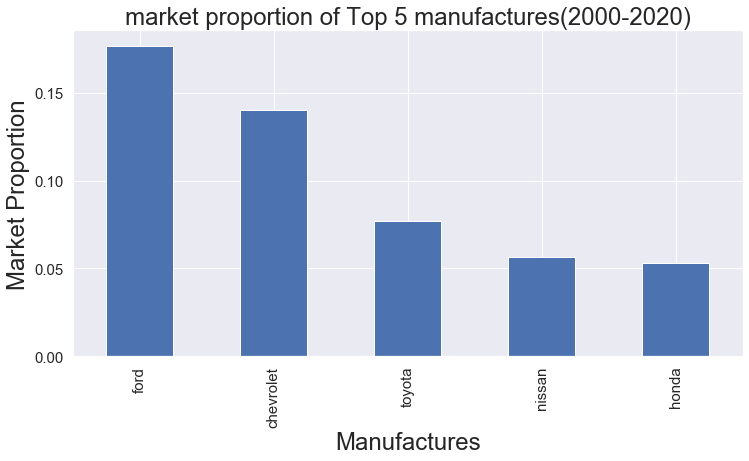

In [51]:
#the rank of market share of the 5 manufactures


sns.set(font_scale=2)
count.plot(kind='bar',figsize=(12, 6),fontsize= 15)
plt.title('market proportion of Top 5 manufactures(2000-2020)')
plt.xlabel('Manufactures')
plt.ylabel('Market Proportion')
plt.show()

In [52]:
#get the ford price trend
ford_out=twenty_year[twenty_year['manufacturer']=='ford']
ford_average=ford_out.pivot_table(ford_out,index=['year'],aggfunc=[np.mean])
ford_average.columns=[ 'ford_age','ford_id','ford_odometer','ford_price']

In [53]:
#get the chevrolet price trend
chevrolet_out=twenty_year[twenty_year['manufacturer']=='chevrolet']
chevrolet_average=chevrolet_out.pivot_table(chevrolet_out,index=['year'],aggfunc=[np.mean])
chevrolet_average.columns=['chevrolet_age','chevrolet_id','chevrolet_odometer','chevrolet_price']

In [54]:
#get the toyota price trend
toyota_out=twenty_year[twenty_year['manufacturer']=='toyota']
toyota_average=toyota_out.pivot_table(toyota_out,index=['year'],aggfunc=[np.mean])
toyota_average.columns=[ 'toyota_age','toyota_id','toyota_odometer','toyota_price']

In [55]:
#get the cnissan price trend
nissan_out=twenty_year[twenty_year['manufacturer']=='nissan']
nissan_average=nissan_out.pivot_table(nissan_out,index=['year'],aggfunc=[np.mean])
nissan_average.columns=[ 'nissan_age','nissan_id','nissan_odometer','nissan_price']

In [56]:
#get the honta price trend
honda_out=twenty_year[twenty_year['manufacturer']=='honda']
honda_average=honda_out.pivot_table(honda_out,index=['year'],aggfunc=[np.mean])
honda_average.columns=['honda_age','honda_id','honda_odometer','honda_price']

In [57]:
#concat the 5 data frame
car_price_concat = pd.concat([ford_average,chevrolet_average,toyota_average,nissan_average,honda_average], axis=1)
car_price_concat.head(5)

ford_age       ford_id  ford_odometer   ford_price  chevrolet_age  \
year                                                                      
2001        19  7.044345e+09  154483.959108  6251.054514             19   
2002        18  7.044156e+09  146519.283070  7114.583590             18   
2003        17  7.044079e+09  143191.804859  6372.780731             17   
2004        16  7.044141e+09  138535.187986  7133.445299             16   
2005        15  7.044342e+09  138687.328839  6794.858149             15   

      chevrolet_id  chevrolet_odometer  chevrolet_price  toyota_age  \
year                                                                  
2001  7.044174e+09       143458.384962      5625.800409          19   
2002  7.043942e+09       143965.735265      5703.457011          18   
2003  7.043981e+09       144651.506302      6164.889662          17   
2004  7.043912e+09       140976.458195      6867.733756          16   
2005  7.043811e+09       141834.130138      7314.224651          15   

         toyota_id  toyota_odometer  toyota_price  nissan_age     nissan_id  \
year                                                                          
2001  7.044823e+09    164106.174488   4341.523427          19  7.044851e+09   
2002  7.044770e+09    160926.979764   4533.414027          18  7.044826e+09   
2003  7.044855e+09    145899.740660   5038.165881          17  7.044251e+09   
2004  7.044650e+09    151323.822264   5432.454618          16  7.044917e+09   
2005  7.044800e+09    150696.885329   5847.084940          15  7.044438e+09   

      nissan_odometer  nissan_price  honda_age      honda_id  honda_odometer  \
year                                                                           
2001    151742.620715   3006.435407         19  7.045168e+09   145996.823037   
2002    147152.619709   3237.842342         18  7.045043e+09   150280.583628   
2003    130099.736624   3734.590909         17  7.044489e+09   152636.085385   
2004    139205.928706   4443.837580         16  7.044479e+09   150144.386531   
2005    136990.696428   4336.257449         15  7.044703e+09   149442.698814   

      honda_price  
year               
2001  2625.085837  
2002  2867.522003  
2003  3192.570988  
2004  3565.587896  
2005  3970.697402

In [58]:
car_price_concat.index.astype(int)

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='year')

In [59]:
#filter the year of past 20 years
car_price_trend=car_price_concat.loc[(car_price_concat.index>2000)&(car_price_concat.index<2020)]

In [60]:
car_price_trend.head(5)

ford_age       ford_id  ford_odometer   ford_price  chevrolet_age  \
year                                                                      
2001        19  7.044345e+09  154483.959108  6251.054514             19   
2002        18  7.044156e+09  146519.283070  7114.583590             18   
2003        17  7.044079e+09  143191.804859  6372.780731             17   
2004        16  7.044141e+09  138535.187986  7133.445299             16   
2005        15  7.044342e+09  138687.328839  6794.858149             15   

      chevrolet_id  chevrolet_odometer  chevrolet_price  toyota_age  \
year                                                                  
2001  7.044174e+09       143458.384962      5625.800409          19   
2002  7.043942e+09       143965.735265      5703.457011          18   
2003  7.043981e+09       144651.506302      6164.889662          17   
2004  7.043912e+09       140976.458195      6867.733756          16   
2005  7.043811e+09       141834.130138      7314.224651          15   

         toyota_id  toyota_odometer  toyota_price  nissan_age     nissan_id  \
year                                                                          
2001  7.044823e+09    164106.174488   4341.523427          19  7.044851e+09   
2002  7.044770e+09    160926.979764   4533.414027          18  7.044826e+09   
2003  7.044855e+09    145899.740660   5038.165881          17  7.044251e+09   
2004  7.044650e+09    151323.822264   5432.454618          16  7.044917e+09   
2005  7.044800e+09    150696.885329   5847.084940          15  7.044438e+09   

      nissan_odometer  nissan_price  honda_age      honda_id  honda_odometer  \
year                                                                           
2001    151742.620715   3006.435407         19  7.045168e+09   145996.823037   
2002    147152.619709   3237.842342         18  7.045043e+09   150280.583628   
2003    130099.736624   3734.590909         17  7.044489e+09   152636.085385   
2004    139205.928706   4443.837580         16  7.044479e+09   150144.386531   
2005    136990.696428   4336.257449         15  7.044703e+09   149442.698814   

      honda_price  
year               
2001  2625.085837  
2002  2867.522003  
2003  3192.570988  
2004  3565.587896  
2005  3970.697402

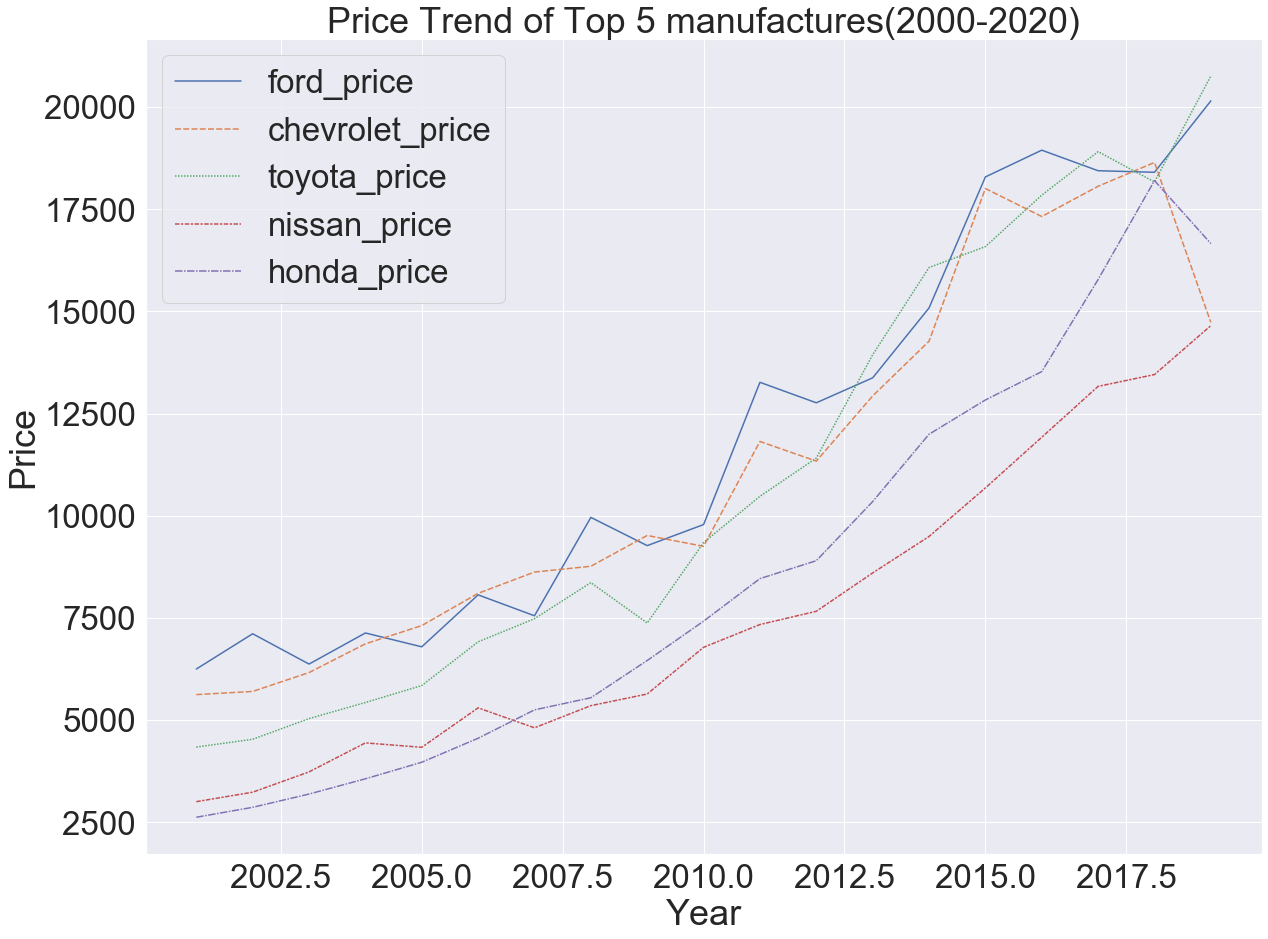

In [61]:
#line plot
dd=[car_price_trend['ford_price'],car_price_trend['chevrolet_price'],car_price_trend['toyota_price'],car_price_trend['nissan_price'],car_price_trend['honda_price']]
plt.figure(figsize=(20,15))
sns.set(font_scale=3)
sns.lineplot(data=dd)
plt.title('Price Trend of Top 5 manufactures(2000-2020)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Pick the most popular five manufacturers and compare their market shares in the past 20 years

In [62]:
#filter the year
five_car_20=clean_data[(clean_data['year']>2000)&(clean_data['year']<2020)]

In [63]:
five_car_20=pd.DataFrame(data=five_car_20)

In [64]:
#filter the manufacturers
five_car_20=five_car_20.loc[(five_car_20['manufacturer']=='ford')|(df['manufacturer']=='chevrolet')|(df['manufacturer']=='toyota')|(df['manufacturer']=='nissan')|(df['manufacturer']=='honda')]
five_car_20.head(5)

id          region  price  year manufacturer   model  condition  \
1   7034440610  salt lake city      0  2016         ford   f-150  excellent   
3   7034440546  salt lake city      0  2016         ford   f-150  excellent   
6   7034405619  salt lake city  34500  2017         ford   f-350  excellent   
8   7034404595  salt lake city  12500  2013         ford   f-250  excellent   
12  7034398060  salt lake city  14500  2007       toyota  tundra  excellent   

    odometer title_status transmission drive paint_color odometer_class  \
1       10.0        clean    automatic   4wd     unknown   low odometer   
3       10.0        clean    automatic   4wd     unknown   low odometer   
6    95484.0        clean    automatic   4wd       white   low odometer   
8   226031.0        clean    automatic   4wd       white   low odometer   
12  135287.0        clean    automatic   4wd     unknown   low odometer   

     price_class  age  
1      low price    4  
3      low price    4  
6     high price    3  
8      low price    7  
12  medium price   13

In [65]:
five_20_price=five_car_20.groupby('year').price.mean()

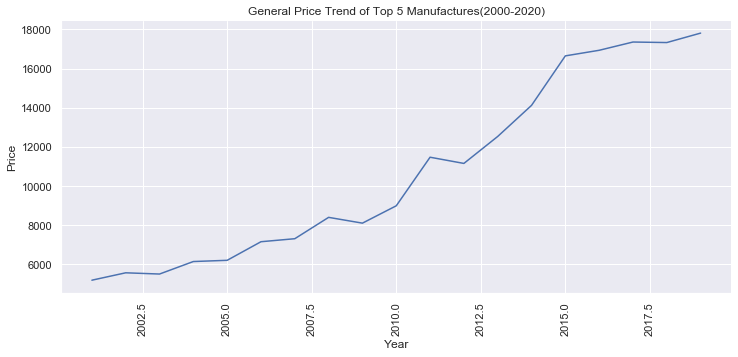

In [66]:
#price trend 
plt.figure(figsize=(12,5))
sns.set(font_scale=1)
sns.lineplot(data=five_20_price, ci=None)
sns.despine()
plt.title('General Price Trend of Top 5 Manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


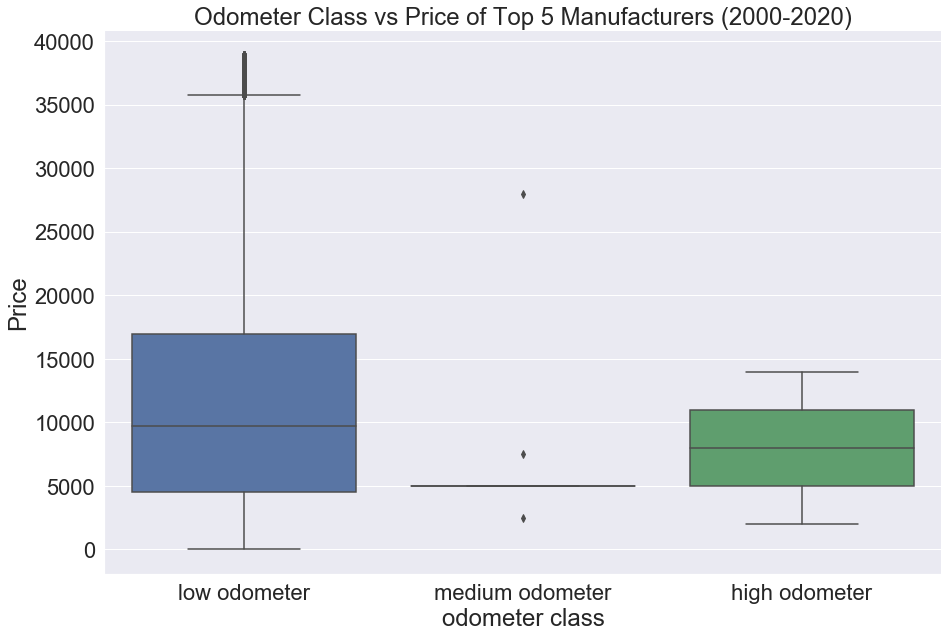

In [67]:
#odometer class and price
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.boxplot(x='odometer_class',y='price',data=five_car_20)
sns.despine()
plt.title('Odometer Class vs Price of Top 5 Manufacturers (2000-2020)')
plt.xlabel('odometer class')
plt.ylabel('Price')
plt.show()

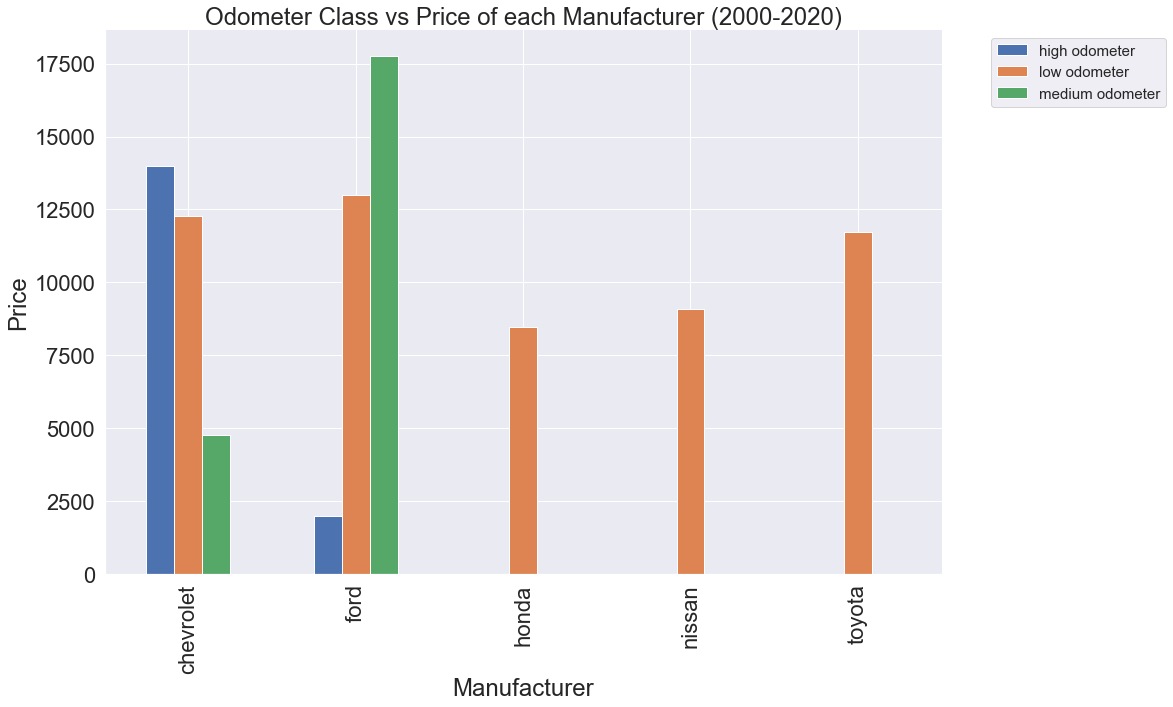

In [68]:
#odometer class and price and manufacturer
man_odo_pric_5_20=five_car_20.groupby(['manufacturer','odometer_class']).price.mean()
_=man_odo_pric_5_20.unstack().plot(kind='bar',figsize=(15,10),fontsize= 22)
_.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)
sns.despine()
plt.title('Odometer Class vs Price of each Manufacturer (2000-2020)')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

In [69]:
#price and manufacture
five_manu_price=five_car_20.groupby('manufacturer').price.mean()

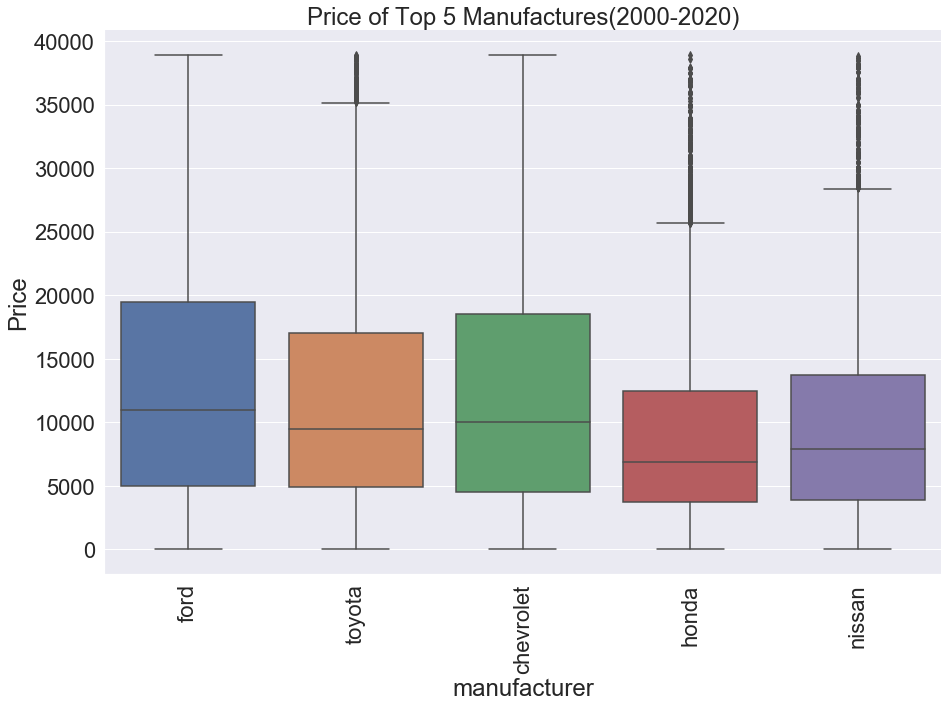

In [70]:
#price and manufacture
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.boxplot(x='manufacturer',y='price',data=five_car_20)
sns.despine()
plt.title('Price of Top 5 Manufactures(2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('manufacturer')
plt.ylabel('Price')
plt.show()


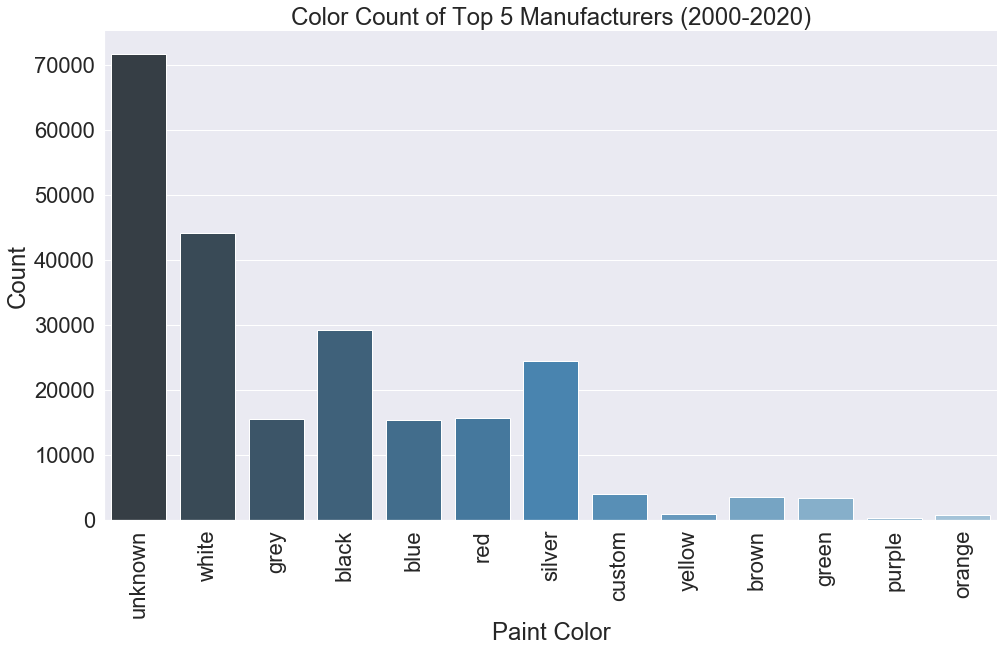

In [71]:
#price and Color
# condition counts
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.countplot(x='paint_color',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Color Count of Top 5 Manufacturers (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Paint Color')
plt.ylabel('Count')
plt.show()

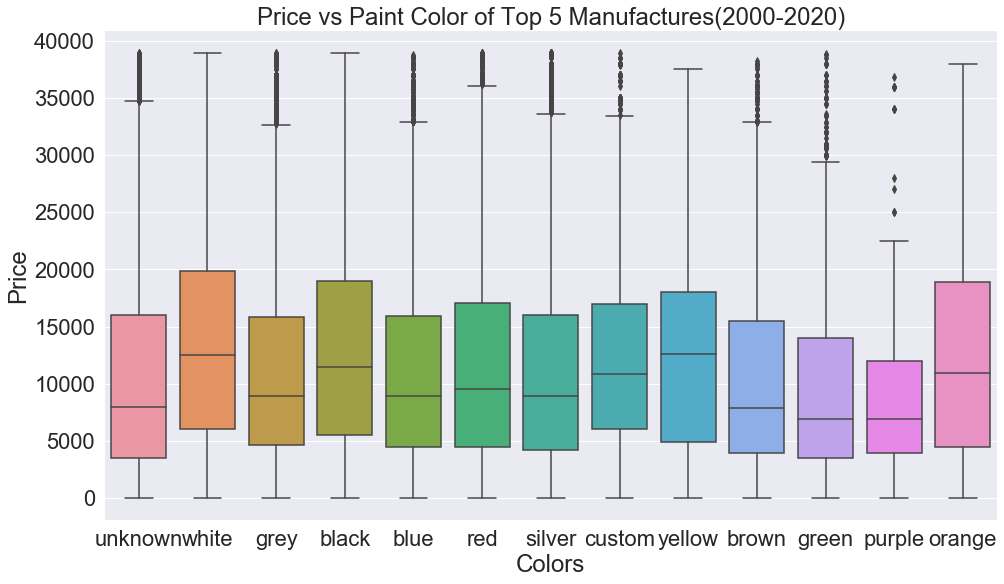

In [72]:
# color and price
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='paint_color',y='price',data=five_car_20)
sns.despine()
plt.title('Price vs Paint Color of Top 5 Manufactures(2000-2020)')
plt.xlabel('Colors')
plt.ylabel('Price')
plt.show()

In [73]:
df2=five_car_20.groupby([ 'year','manufacturer']).size()

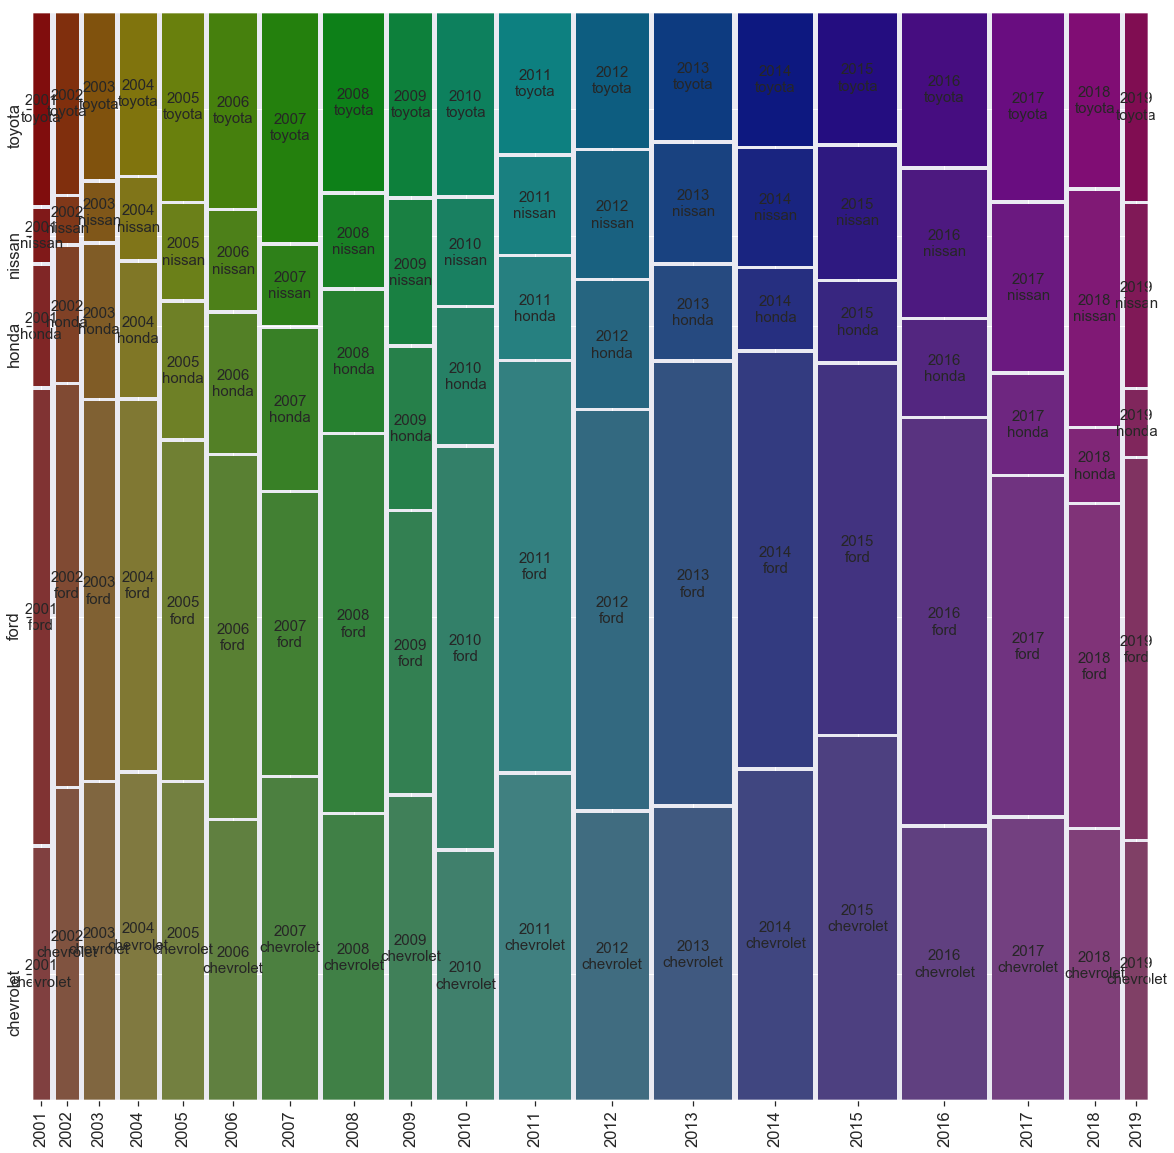

In [74]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [20, 20]
sns.set(font_scale=1.5)
mosaic(df2,gap=0.005, label_rotation=90.0)


plt.show()

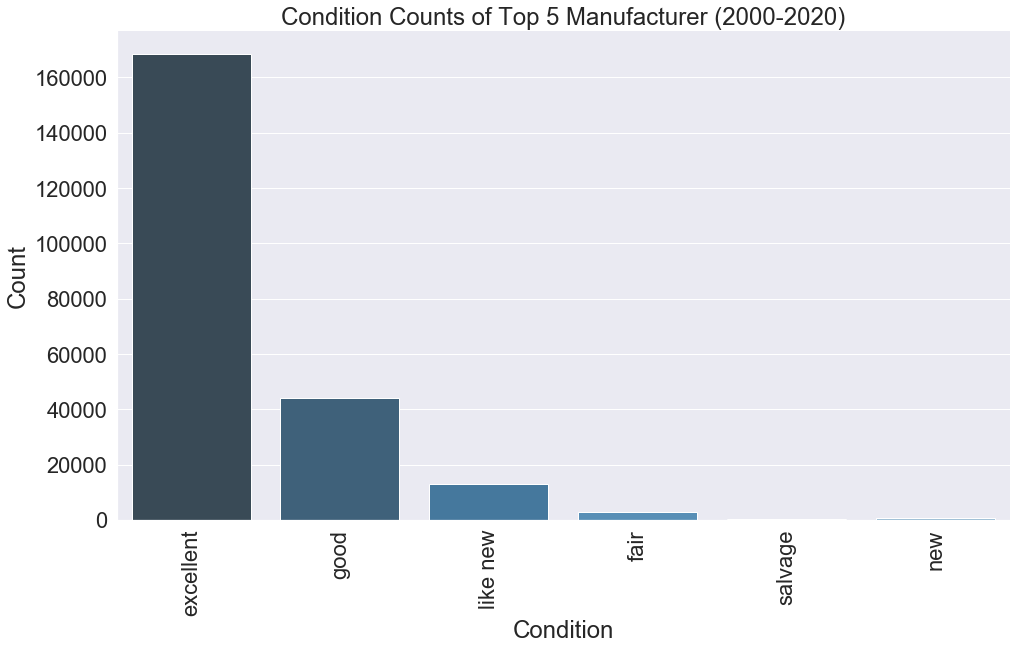

In [75]:
# condition counts
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.countplot(x='condition',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Condition Counts of Top 5 Manufacturer (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

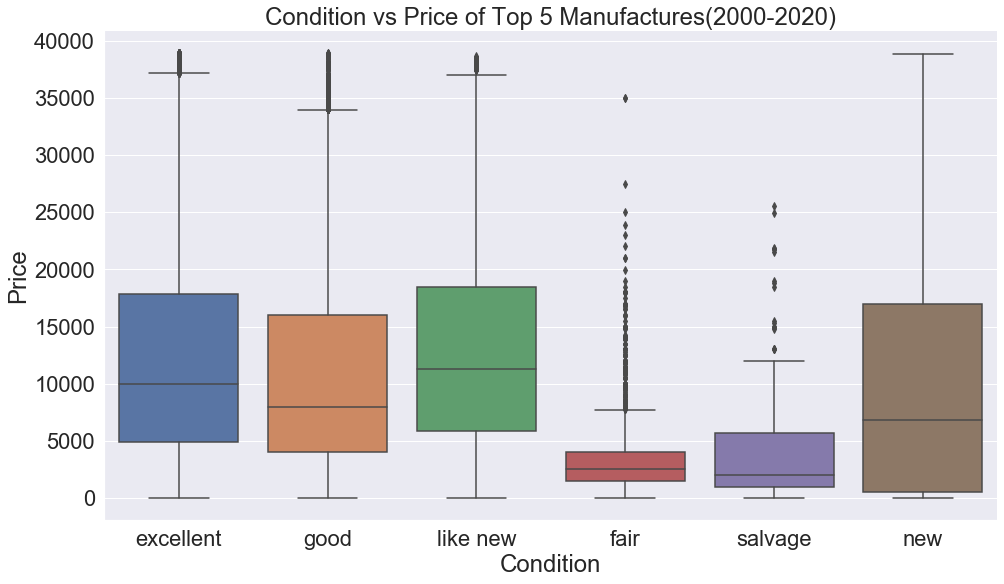

In [76]:
#price and condition
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='condition',y='price',data=five_car_20)
sns.despine()
plt.title('Condition vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


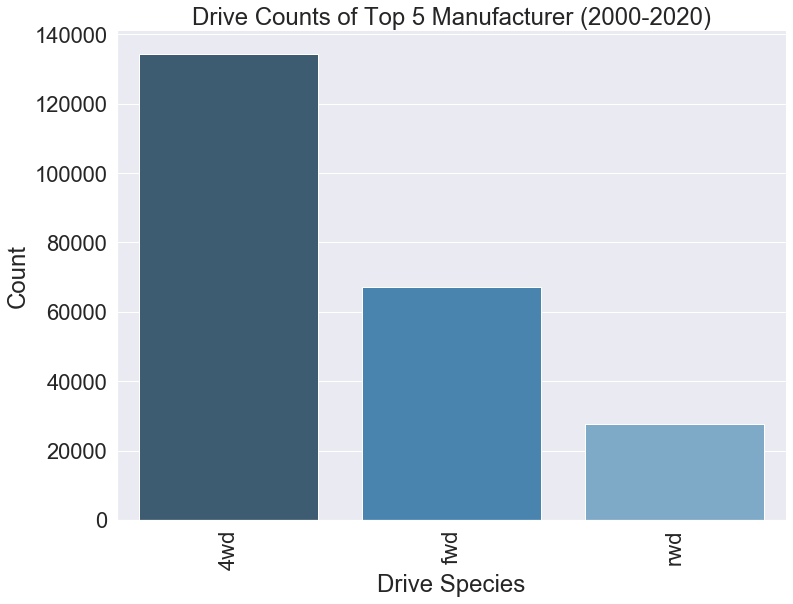

In [77]:
# Drive Counts
plt.figure(figsize=(12,9))
sns.set(font_scale=2)
sns.countplot(x='drive',data=five_car_20,palette="Blues_d")
sns.despine()
plt.title('Drive Counts of Top 5 Manufacturer (2000-2020)')
plt.xticks(rotation= 90)
plt.xlabel('Drive Species')
plt.ylabel('Count')
plt.show()

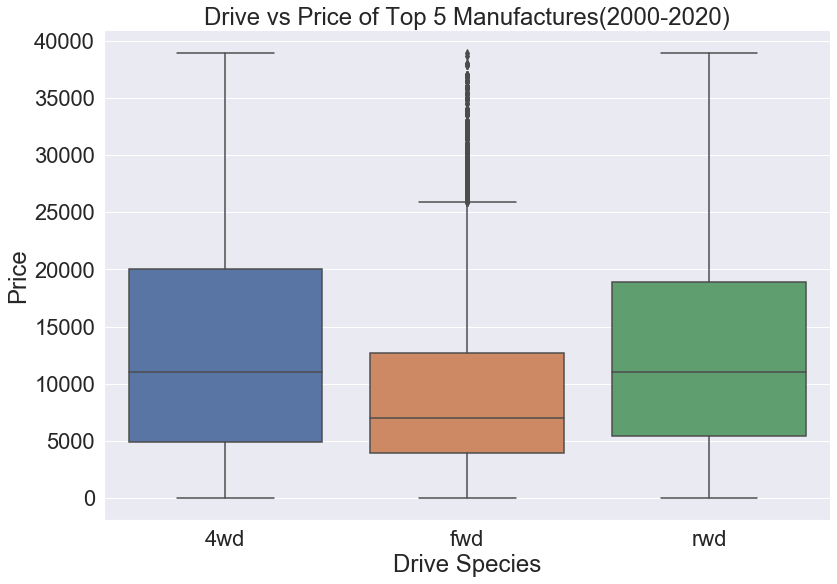

In [78]:
#price and Dive
plt.figure(figsize=(13,9))
sns.set(font_scale=2)
sns.boxplot(x='drive',y='price',data=five_car_20)
sns.despine()
plt.title('Drive vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Drive Species')
plt.ylabel('Price')
plt.show()

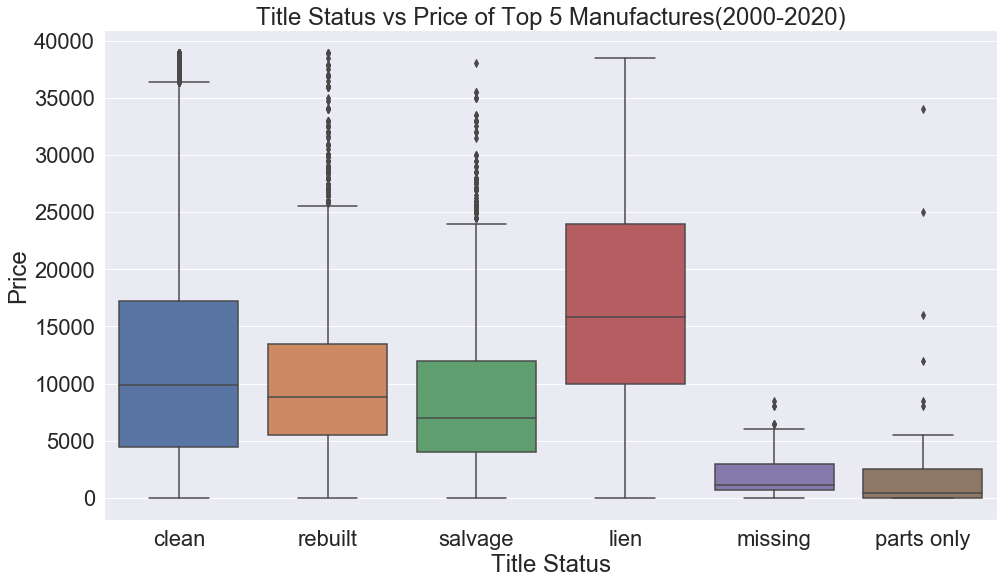

In [79]:
#price and title status
plt.figure(figsize=(16,9))
sns.set(font_scale=2)
sns.boxplot(x='title_status',y='price',data=five_car_20)
sns.despine()
plt.title('Title Status vs Price of Top 5 Manufactures(2000-2020)')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.show()

### Price distribution of the most popular five manufacturers in 2019 

In [80]:
#filter the year of 2019
five_car_2019=clean_data[clean_data['year']==2019]
five_car_2019.head(5)

#filter the manufacturers
five_car_2019=five_car_2019.loc[(five_car_2019['manufacturer']=='ford')|(five_car_2019['manufacturer']=='chevrolet')|(five_car_2019['manufacturer']=='toyota')|(five_car_2019['manufacturer']=='nissan')|(five_car_2019['manufacturer']=='honda')]
five_car_2019.head(5)

id          region  price  year manufacturer         model  \
72  7033356648  salt lake city  12495  2019       nissan        altima   
85  7033268169  salt lake city  26950  2019       nissan        armada   
92  7033242672  salt lake city   8995  2019       nissan        sentra   
97  7033228648  salt lake city  14800  2019    chevrolet       equinox   
98  7033226558  salt lake city   8995  2019    chevrolet  express 3500   

    condition  odometer title_status transmission drive paint_color  \
72  excellent   11092.0        clean    automatic   fwd       black   
85  excellent    8871.0        clean    automatic   4wd       black   
92  excellent   19558.0        clean    automatic   fwd        blue   
97  excellent   10868.0        clean    automatic   4wd       black   
98  excellent    7974.0      salvage    automatic   rwd       white   

   odometer_class   price_class  age  
72   low odometer     low price    1  
85   low odometer    high price    1  
92   low odometer     low price    1  
97   low odometer  medium price    1  
98   low odometer     low price    1

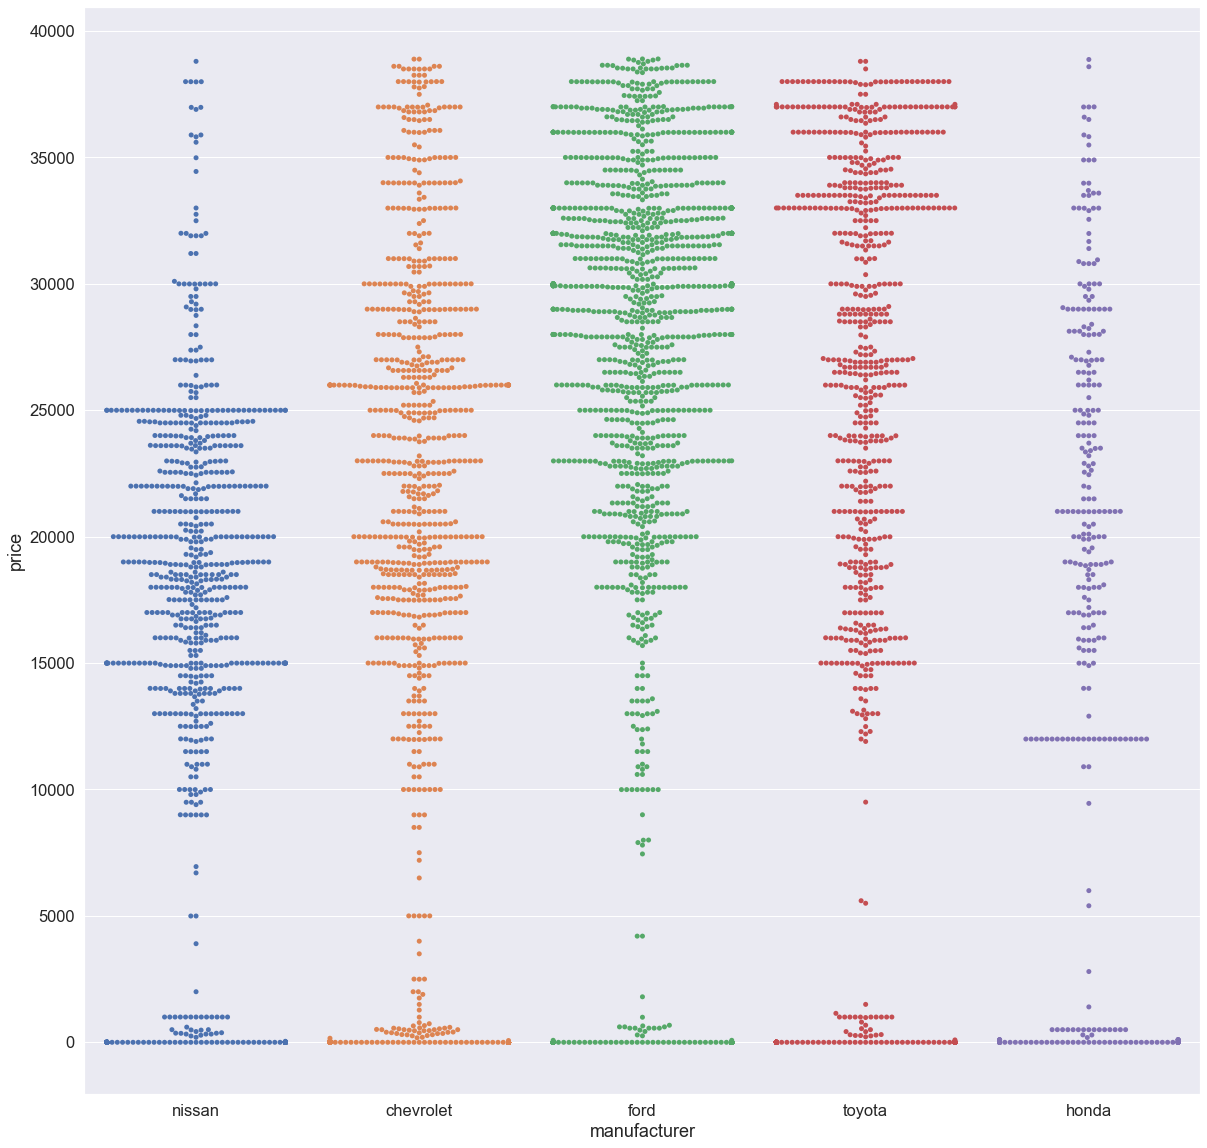

In [81]:
sns.set(font_scale=1.5)
sns.swarmplot(x= 'manufacturer',y='price',data=five_car_2019)

plt.show()

<Figure size 1440x1440 with 0 Axes>

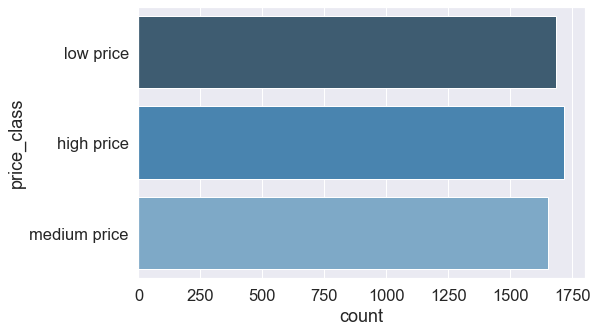

In [82]:
sns.set(font_scale=1.5)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(y='price_class',data=five_car_2019,palette="Blues_d")
plt.show()

## analysis each manufacturer data of the past 20 years

In [83]:
# the data of past 20 years
data_20=clean_data.loc[(clean_data.year>2000)&(clean_data.year<2020)]
data_20.head(5)

id          region  price  year manufacturer    model  condition  \
0  7034441763  salt lake city  17899  2012   volkswagen   golf r  excellent   
1  7034440610  salt lake city      0  2016         ford    f-150  excellent   
3  7034440546  salt lake city      0  2016         ford    f-150  excellent   
5  7034406582  salt lake city  13999  2009          ram  unknown  excellent   
6  7034405619  salt lake city  34500  2017         ford    f-350  excellent   

   odometer title_status transmission drive paint_color odometer_class  \
0   63500.0        clean       manual   4wd       black   low odometer   
1      10.0        clean    automatic   4wd     unknown   low odometer   
3      10.0        clean    automatic   4wd     unknown   low odometer   
5  120057.0        clean    automatic   4wd      silver   low odometer   
6   95484.0        clean    automatic   4wd       white   low odometer   

    price_class  age  
0  medium price    8  
1     low price    4  
3     low price    4  
5  medium price   11  
6    high price    3

In [84]:
# all the manufacturers
data_20['manufacturer']

0         volkswagen
1               ford
3               ford
5                ram
6               ford
             ...    
509572        nissan
509573           bmw
509574          jeep
509575       unkonwn
509576           ram
Name: manufacturer, Length: 454549, dtype: object

### * Ford data of past 20 years analysis

In [85]:
def price_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Year vs Price of Ford')
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

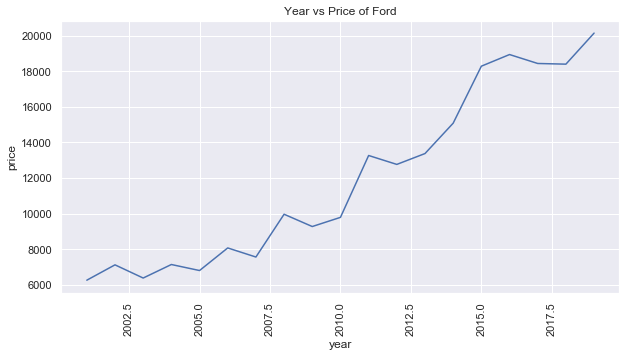

In [86]:
# ford price trend
price_20('ford')  

In [87]:
# get a function of paint color, model, condition, price class, odometer class
def manu_20(name):
        name_data=data_20[data_20['manufacturer']==name]
        plt.figure(figsize=(5, 5))
        d1=name_data.paint_color.value_counts()
        d2=name_data.model.value_counts(normalize=True).head(10)
        d3=name_data.condition.value_counts()
        d5=name_data.odometer_class.value_counts()
        d6=name_data.drive.value_counts()
        
        colors=['red','yellowgreen','lightskyblue','C0','C1']
        plt.figure(figsize=(15,15))
       
        plt.subplot(3,2,1);d1.plot(kind='bar',color=['C0','C1'],fontsize= 15);plt.title('paint color')
        plt.subplot(3,2,2);d2.plot(kind='bar',color=['C2','C3'],fontsize= 15);plt.title('model')
        plt.subplot(3,2,3);d3.plot(kind='bar',fontsize= 15)

        plt.subplot(3,2,5);d5.plot(kind='bar',fontsize= 15)
        plt.subplot(3,2,6);d6.plot(kind='bar',fontsize= 15)

       

<Figure size 360x360 with 0 Axes>

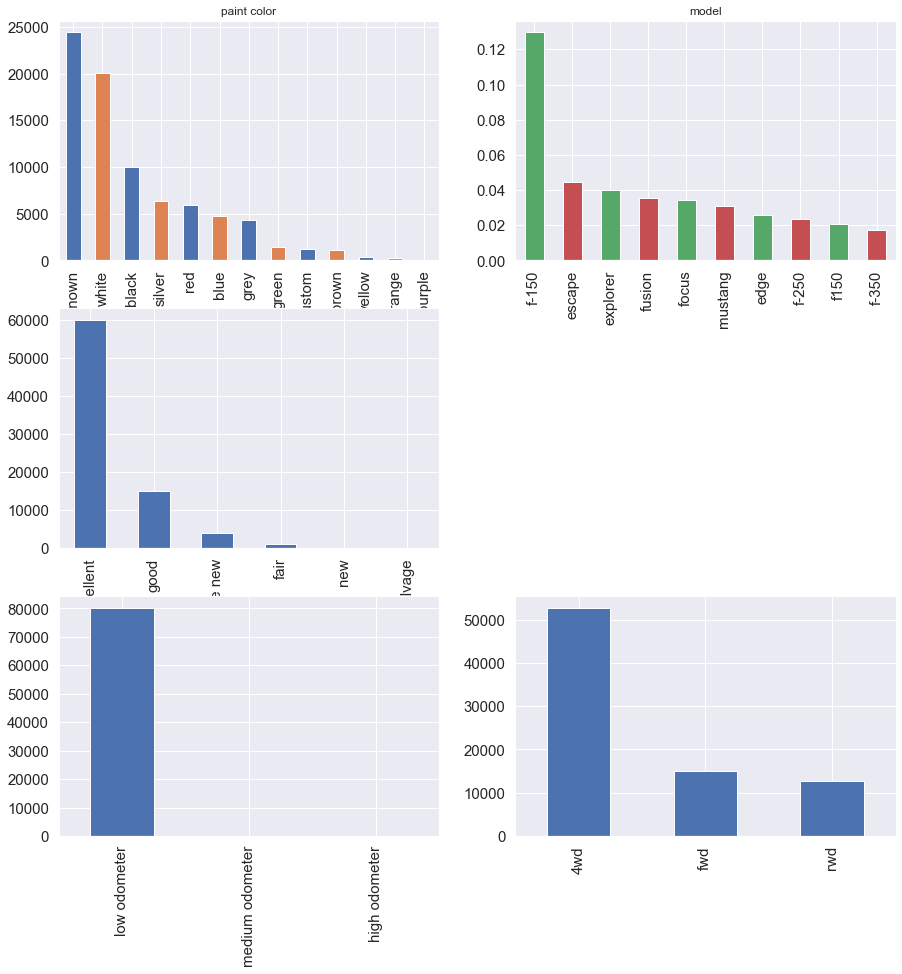

In [88]:
manu_20('ford')  

In [89]:
five_car_20_byprice=five_car_20.sort_values(by=['price'],ascending=False)

<Figure size 1440x1440 with 0 Axes>

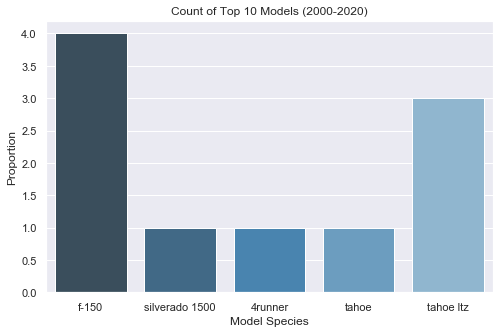

In [90]:
#Count of top 10 models


sns.set(font_scale=1)
sns.despine()
plt.figure(figsize=(8,5))
sns.countplot(x=five_car_20_byprice['model'].head(10),data=five_car_20,palette="Blues_d")
plt.title('Count of Top 10 Models (2000-2020)')
plt.xlabel('Model Species')
plt.ylabel('Proportion')
plt.show()

Text(0, 0.5, 'Price')

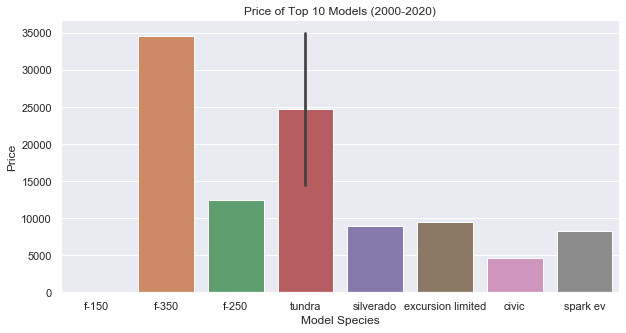

In [91]:
#Price of top 10 models
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.barplot(x=five_car_20['model'].head(10),y='price',data=five_car_20)
sns.despine()
plt.title('Price of Top 10 Models (2000-2020)')
plt.xlabel('Model Species')
plt.ylabel('Price')
 

In [92]:
# the distrubution of condition and price class
def by_condition_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition']).price_class.value_counts(normalize=True)
   
    _=n.unstack().plot(kind='bar',figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

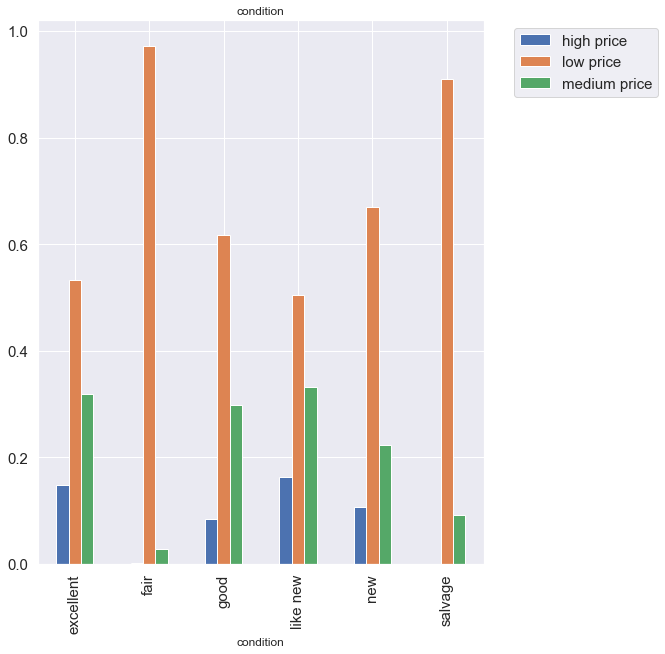

In [93]:
by_condition_price('ford')


In [94]:
# the distrubution of condition, price class and odometer
def by_condition_odometer_price(name):
    n=data_20[data_20['manufacturer']==name]
    n=n.groupby(['condition','odometer_class']).price_class.value_counts(normalize=True)
    _=n.unstack().plot(kind='bar',stacked=False,figsize=(8,10),fontsize= 15,title=('condition'))
    _.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left',prop={'size': 15},ncol=1, shadow=False)

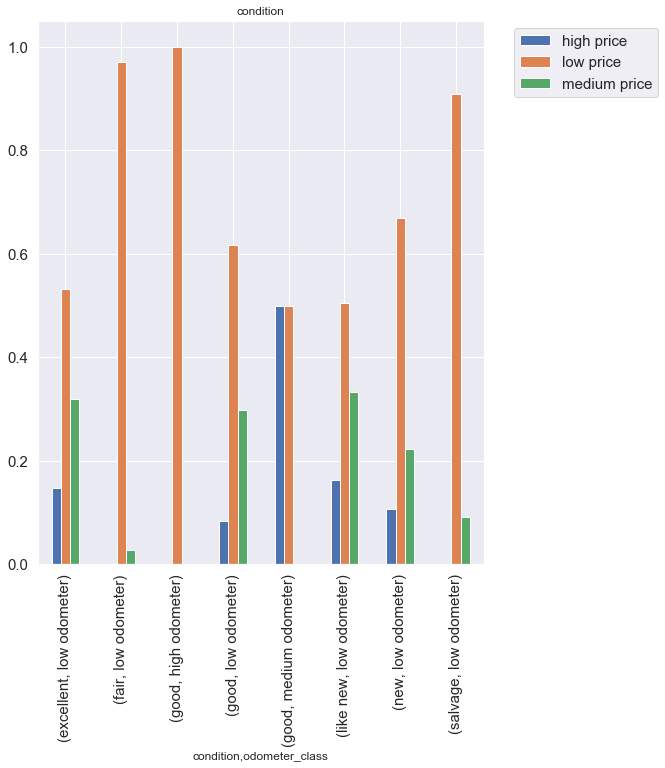

In [95]:
by_condition_odometer_price('ford')

In [96]:
# the price trend
def price_model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(10,5))
        sns.despine()
        sns.set(font_scale=1)
        plt.xticks(rotation= 90)
        plt.xlabel('Year')
        plt.ylabel('Price')
        plt.title('Year vs Price of F-150' )
        sns.lineplot(x=name_data.year, y=name_data.price, ci=None)
        plt.show()

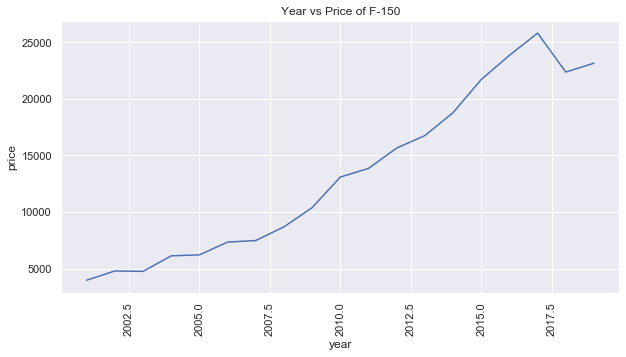

In [97]:
price_model_20('f-150')

In [98]:
# the data of one model
def model_20(name):
        name_data=data_20[data_20['model']==name]
        plt.figure(figsize=(5, 5))
        t1=name_data.condition.value_counts()
        t2=name_data.price_class.value_counts()
        t3=name_data.odometer_class.value_counts()
        
  
        plt.figure(figsize=(15,15))
       
        plt.subplot(2,2,1);t1.plot(kind='bar',fontsize= 15)
        plt.subplot(2,2,2);t2.plot(kind='bar',fontsize= 15)
        plt.subplot(2,2,3);t3.plot(kind='bar',fontsize= 15)

<Figure size 360x360 with 0 Axes>

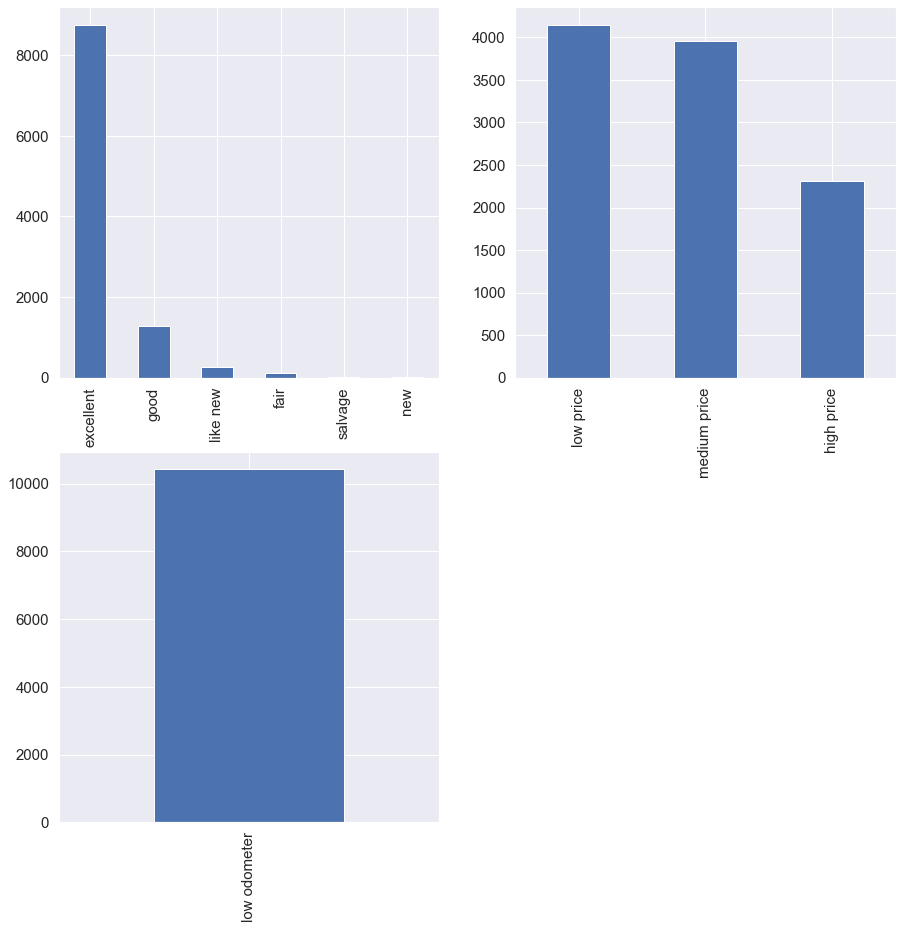

In [99]:
model_20('f-150')

### * chevrolet data of past 20 years analysis

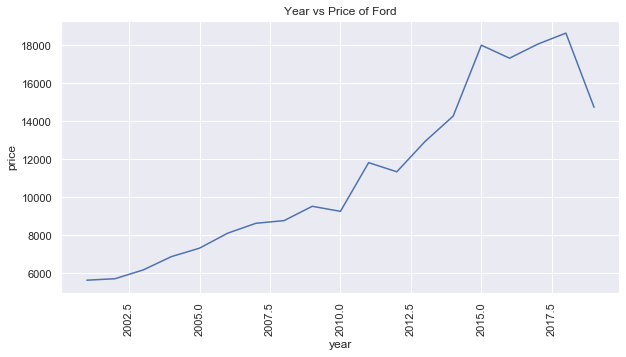

<Figure size 360x360 with 0 Axes>

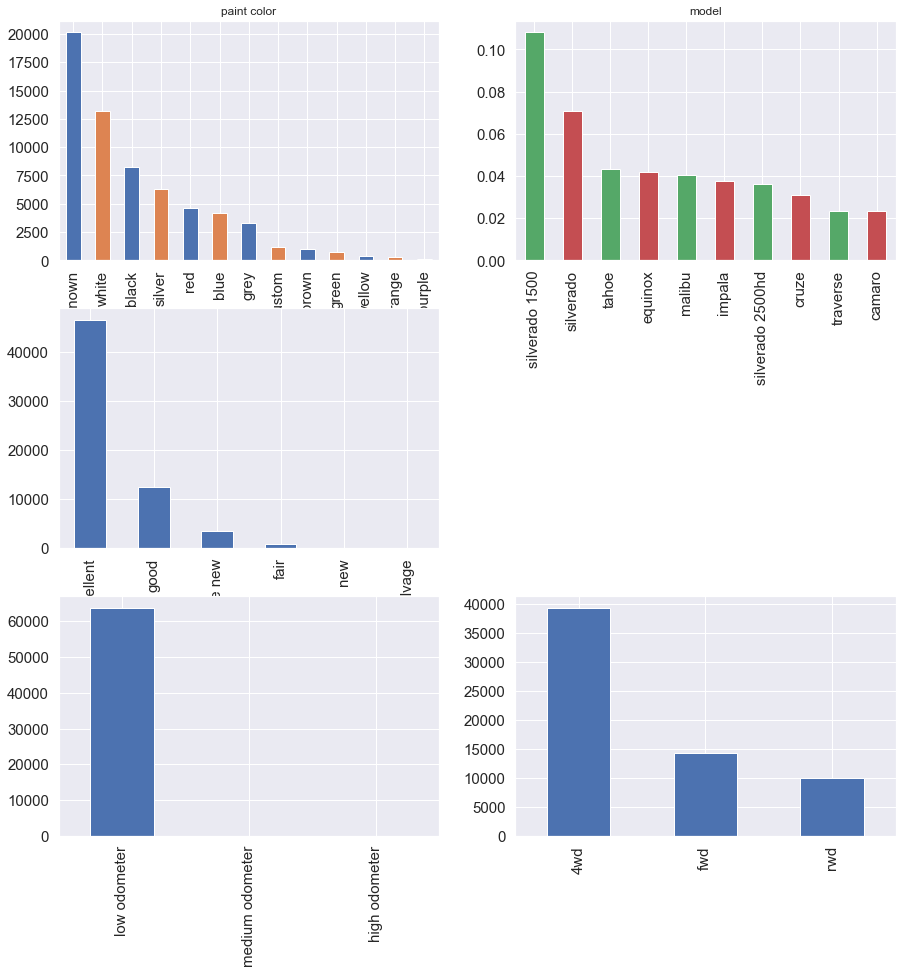

In [100]:
price_20('chevrolet') 
manu_20('chevrolet')

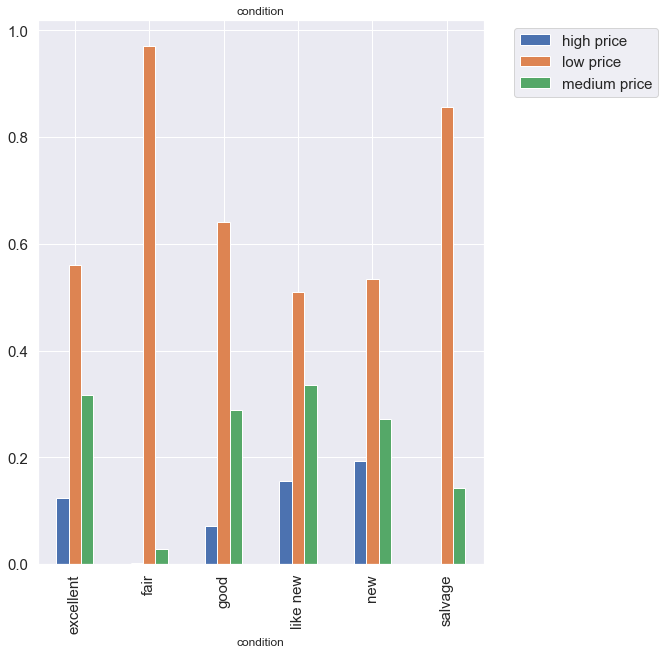

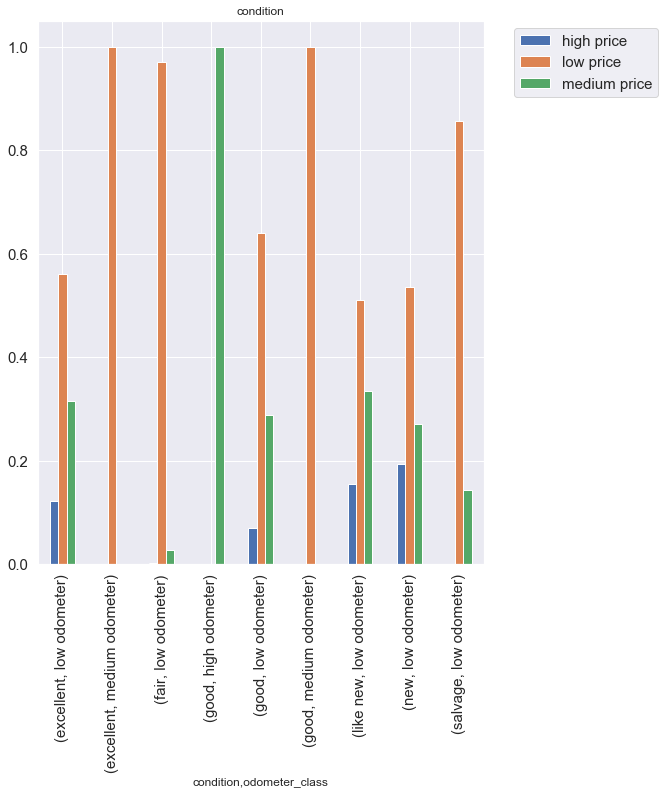

In [101]:
by_condition_price('chevrolet')
by_condition_odometer_price('chevrolet')

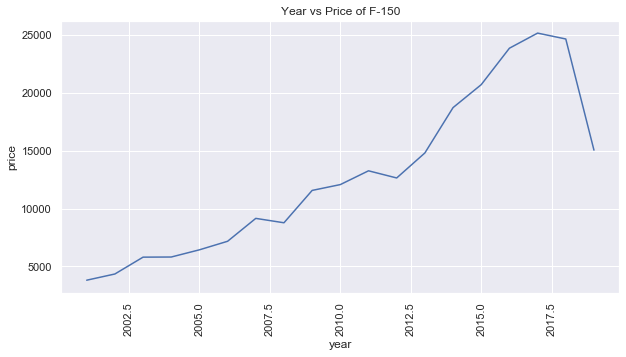

<Figure size 360x360 with 0 Axes>

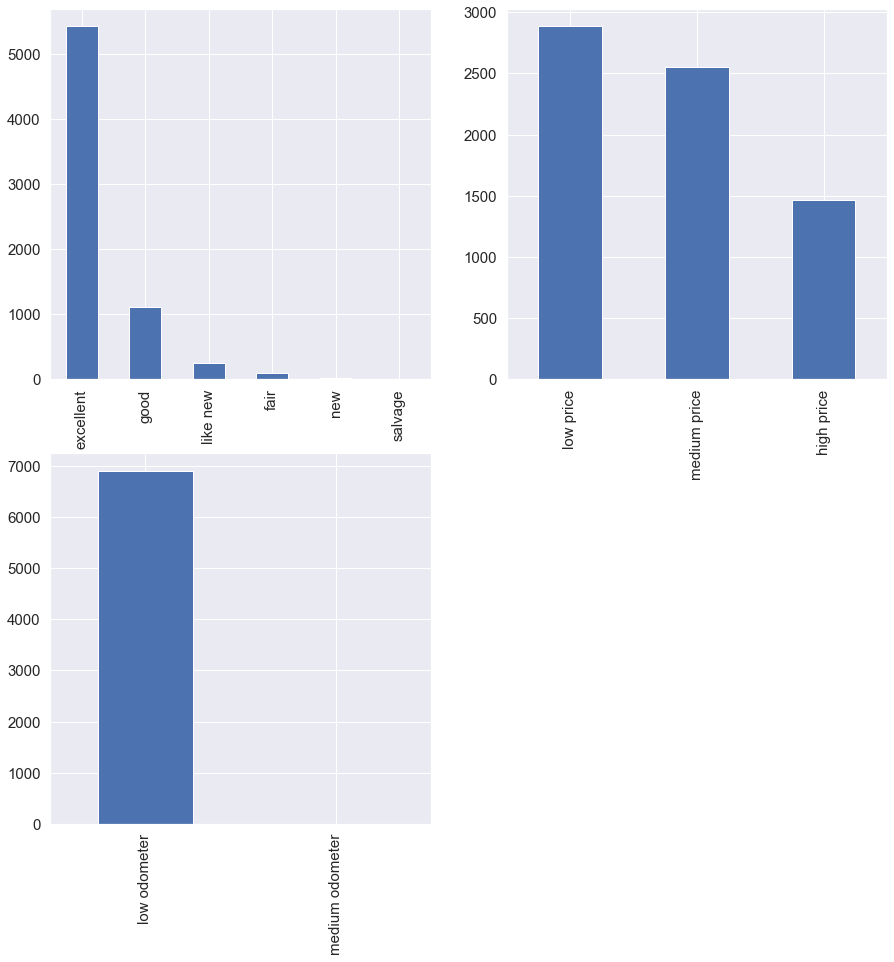

In [102]:
price_model_20('silverado 1500')
model_20('silverado 1500')

### * toyota data of past 20 years analysis

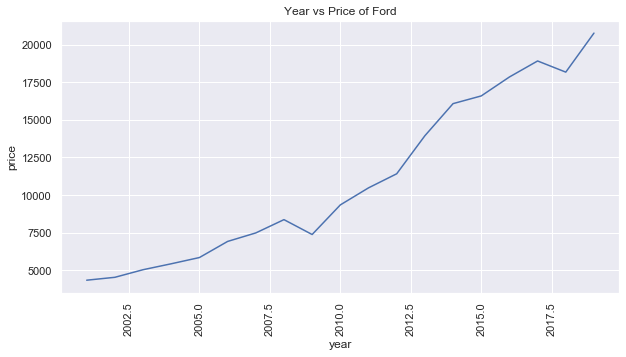

<Figure size 360x360 with 0 Axes>

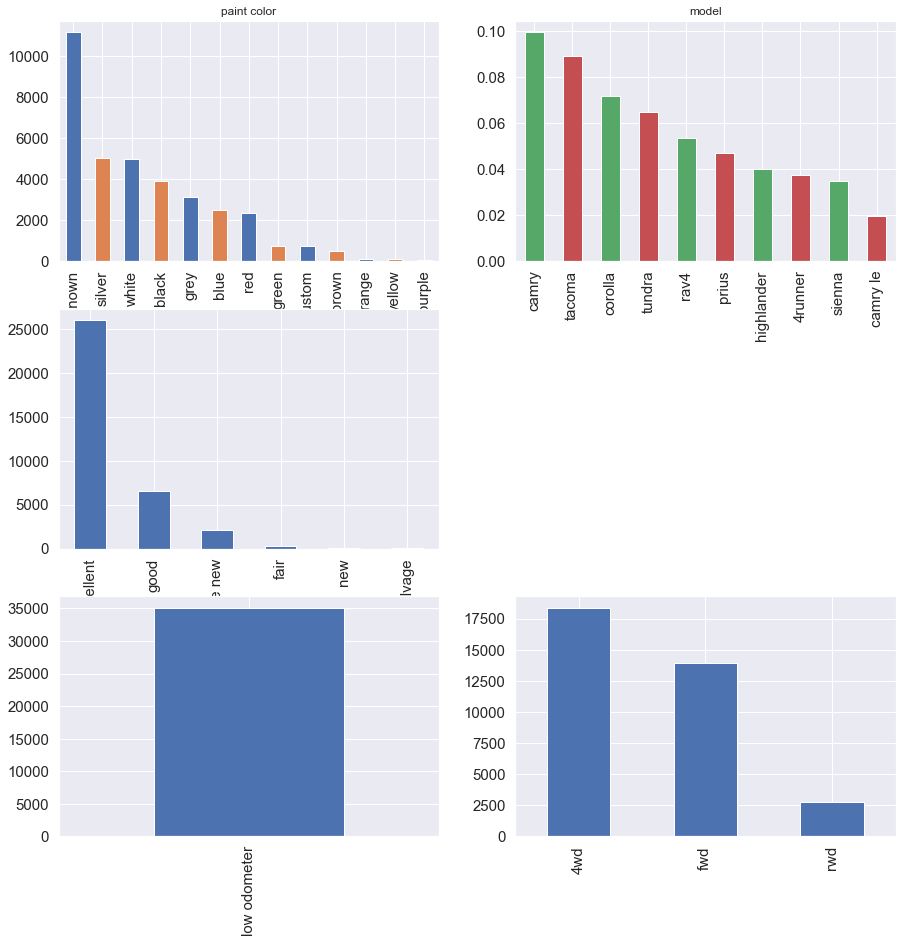

In [103]:
price_20('toyota') 
manu_20('toyota')

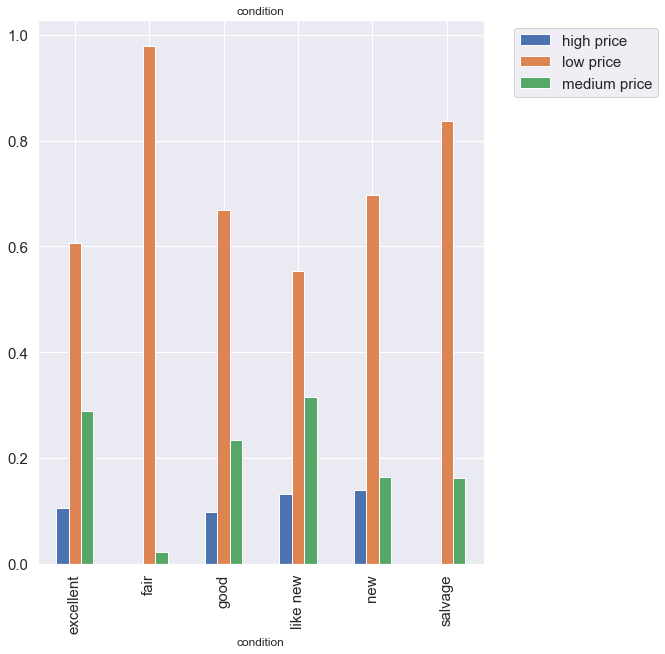

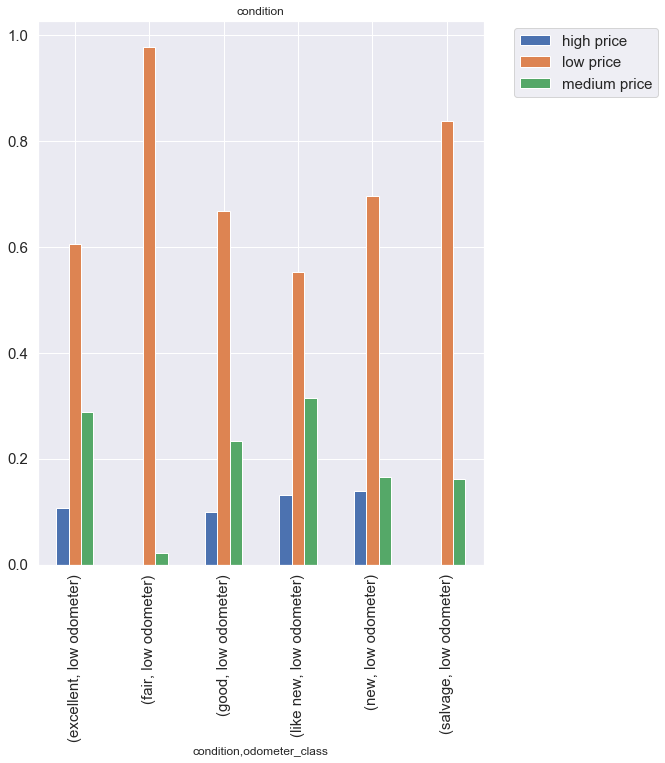

In [104]:
by_condition_price('toyota')
by_condition_odometer_price('toyota')

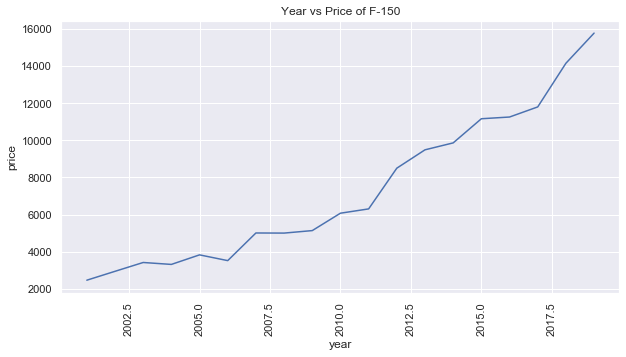

<Figure size 360x360 with 0 Axes>

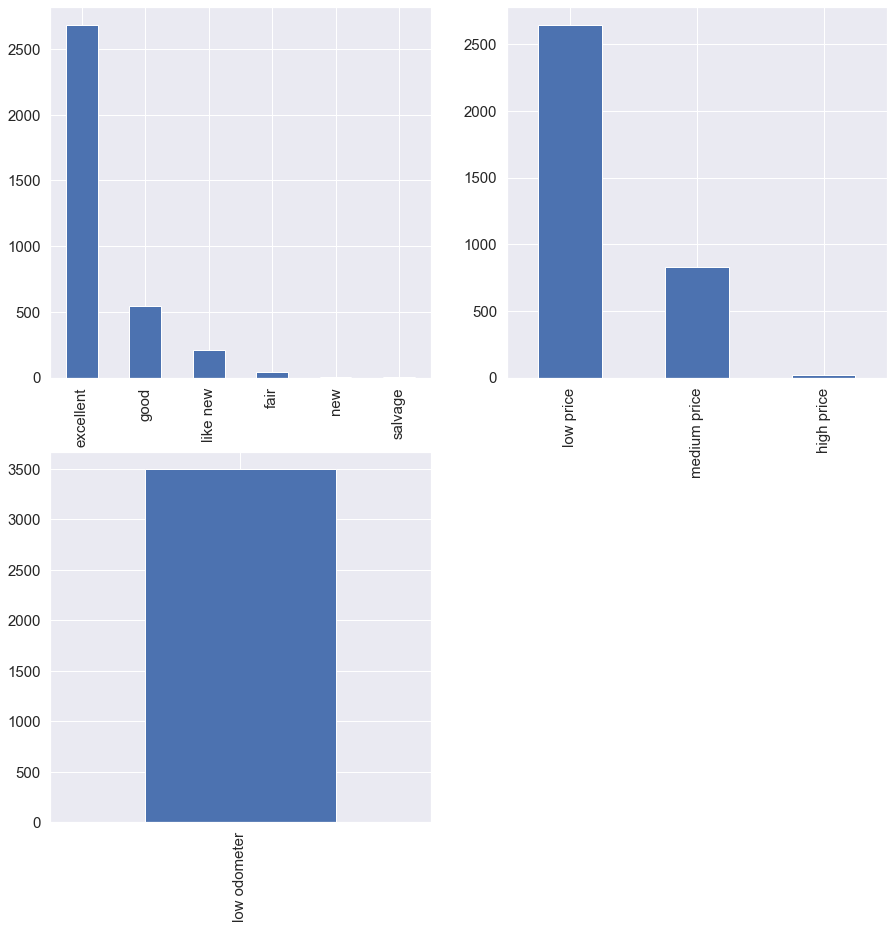

In [105]:
price_model_20('camry')
model_20('camry')

### * nissan data of past 20 years analysis

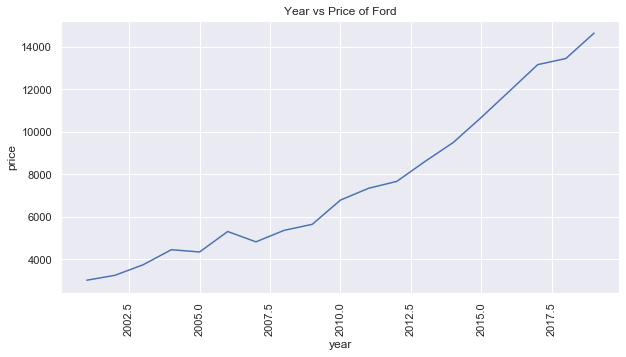

<Figure size 360x360 with 0 Axes>

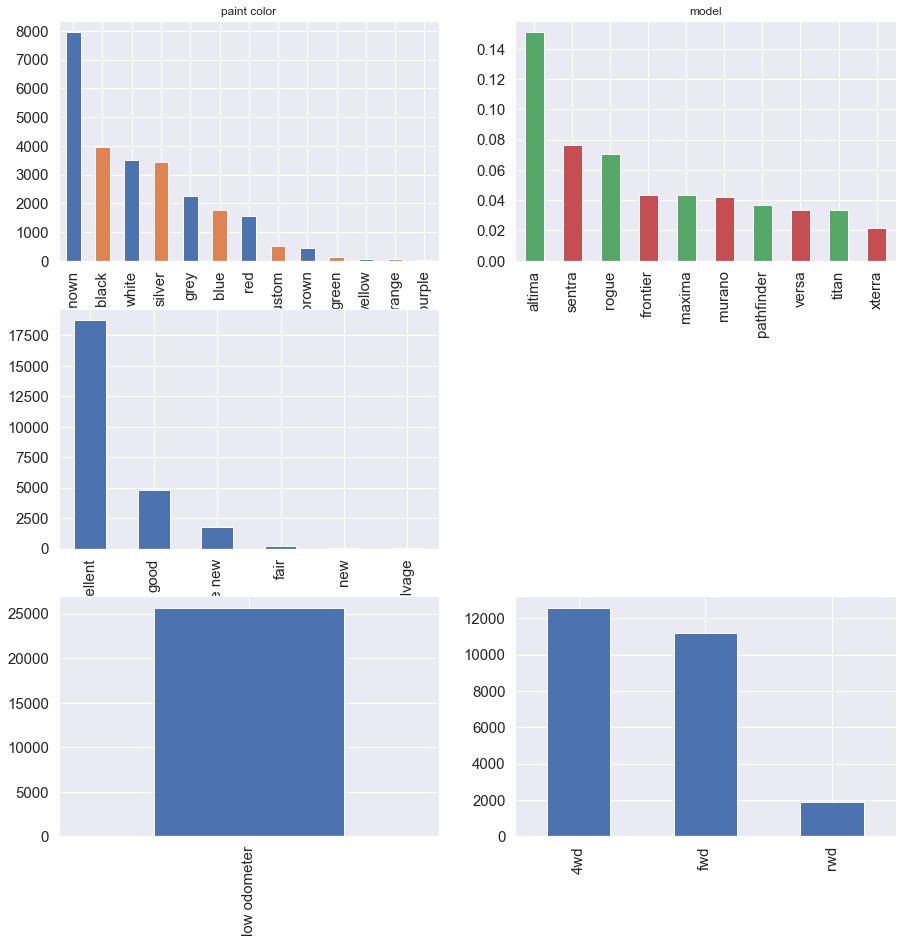

In [106]:
price_20('nissan') 
manu_20('nissan')

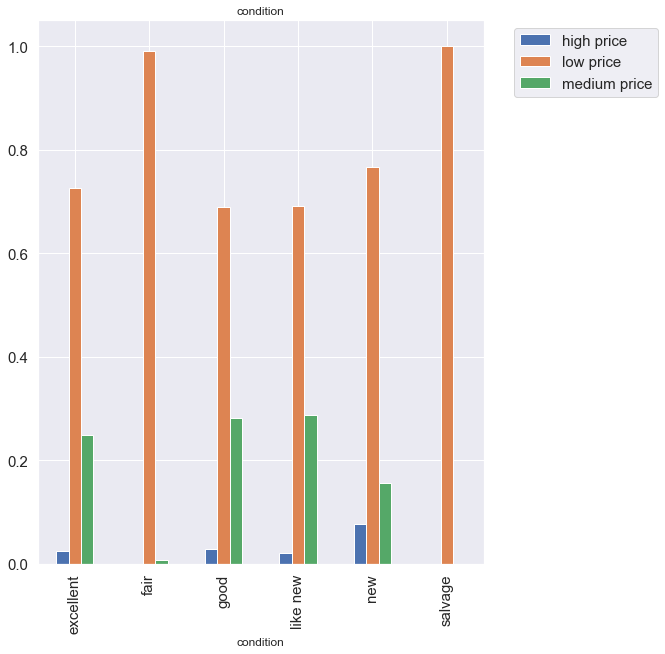

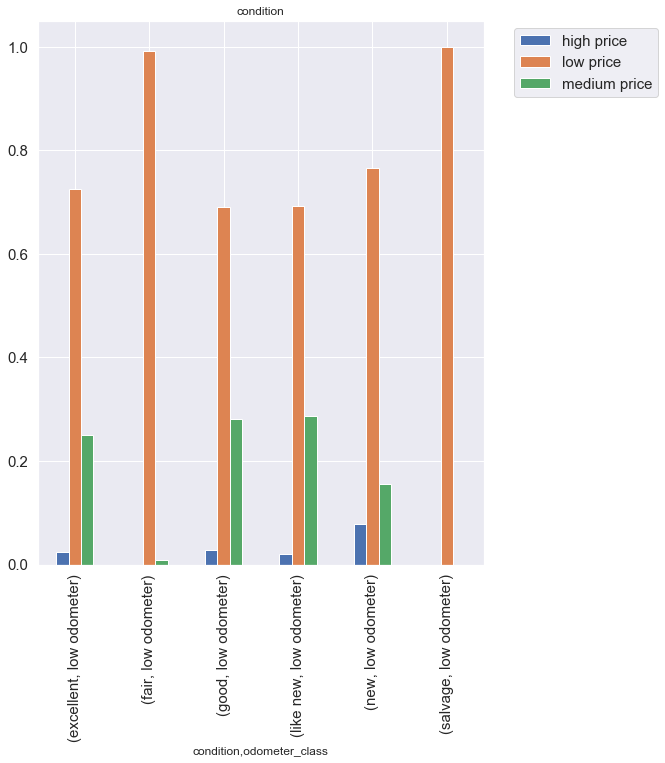

In [107]:

by_condition_price('nissan')
by_condition_odometer_price('nissan')

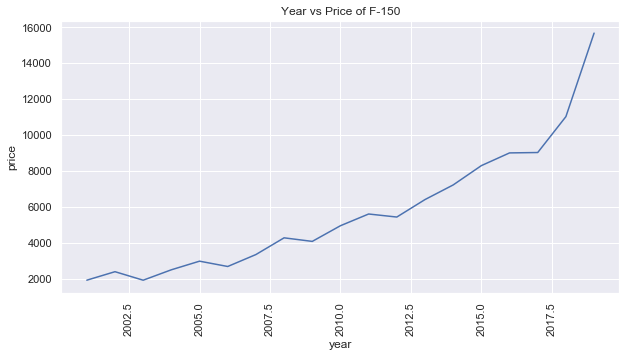

<Figure size 360x360 with 0 Axes>

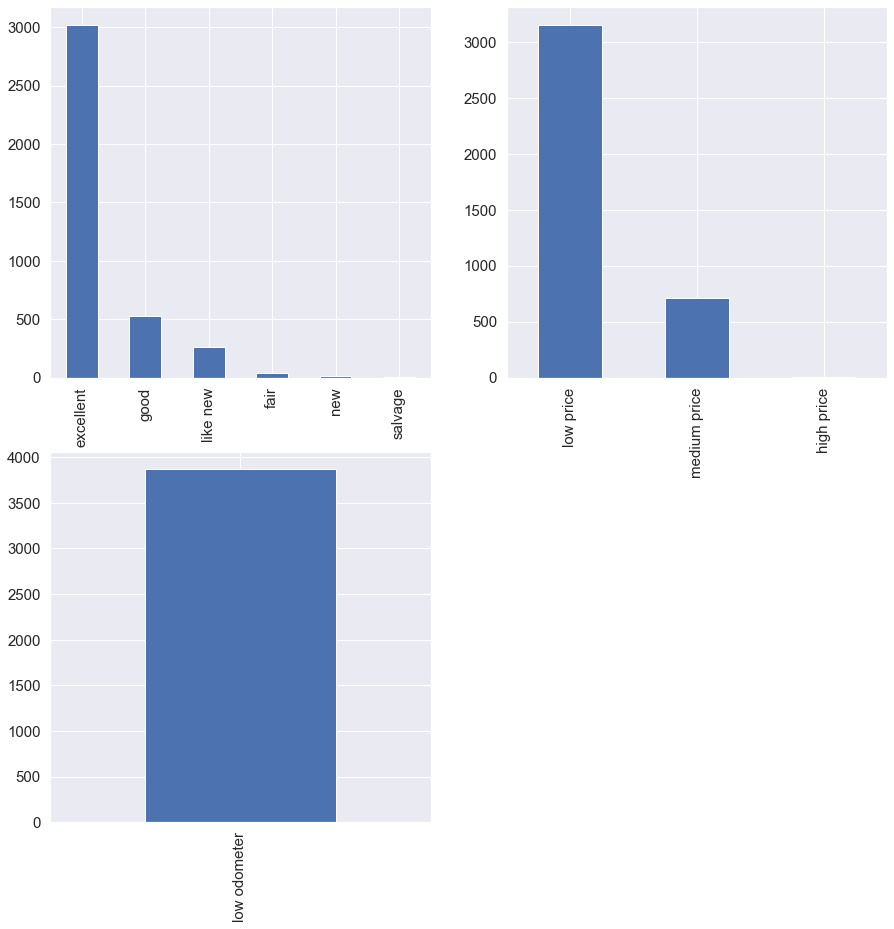

In [108]:
price_model_20('altima')
model_20('altima')

### * Honda' data of past 20 years analysis

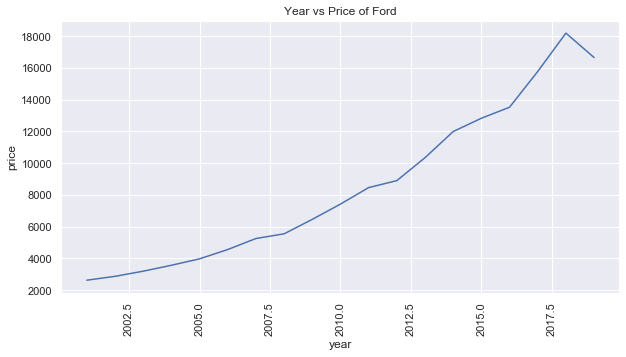

<Figure size 360x360 with 0 Axes>

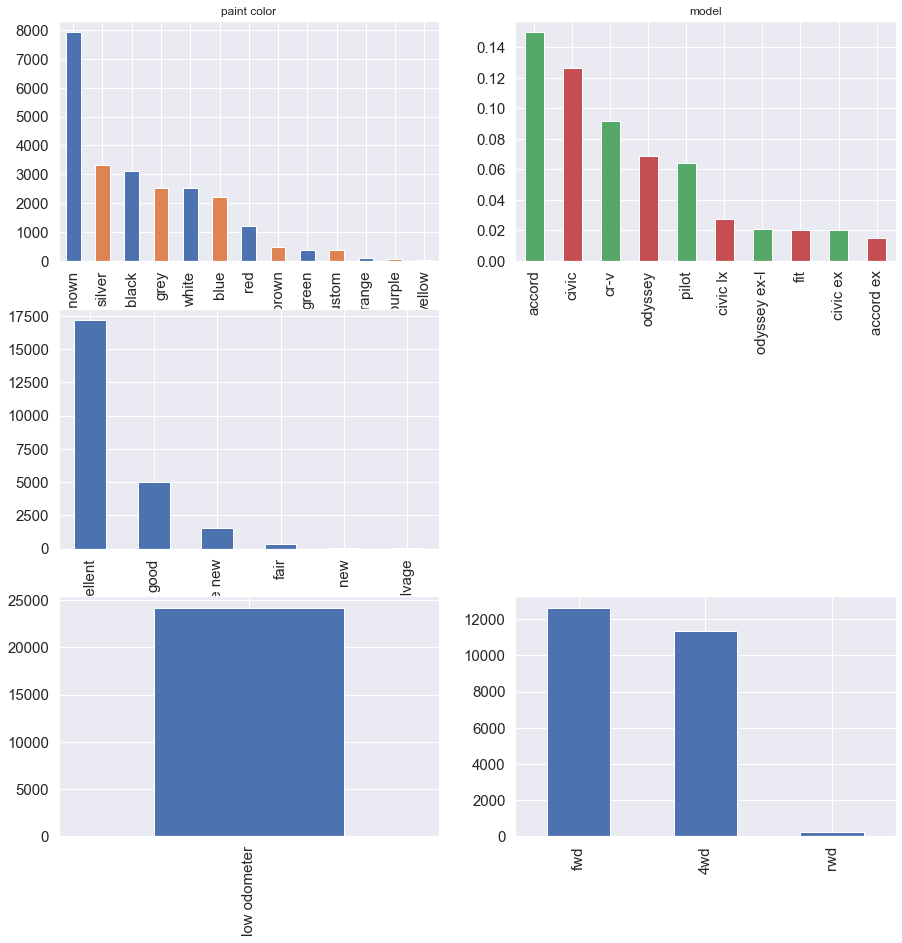

In [109]:
price_20('honda') 
manu_20('honda')

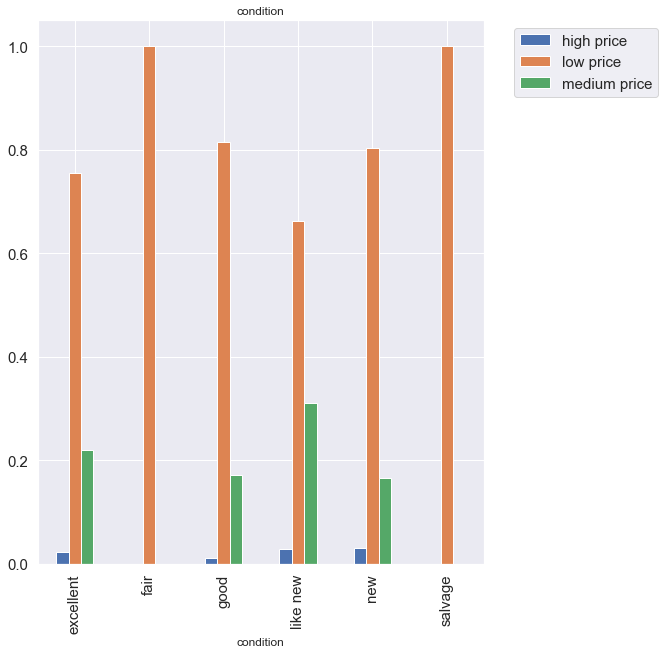

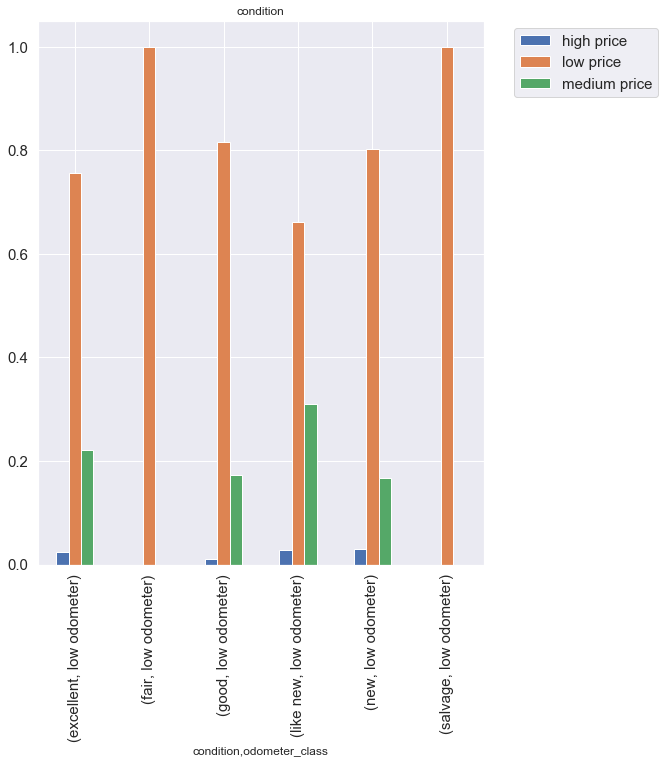

In [110]:
by_condition_price('honda')
by_condition_odometer_price('honda')

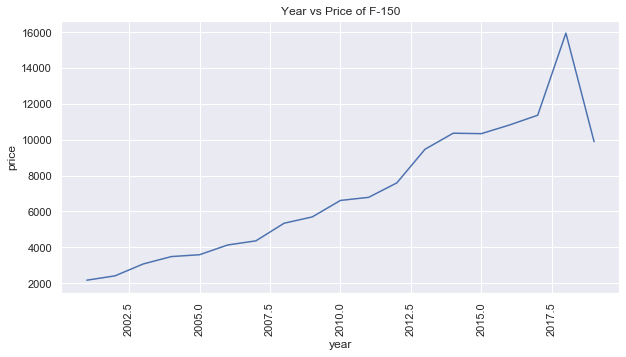

<Figure size 360x360 with 0 Axes>

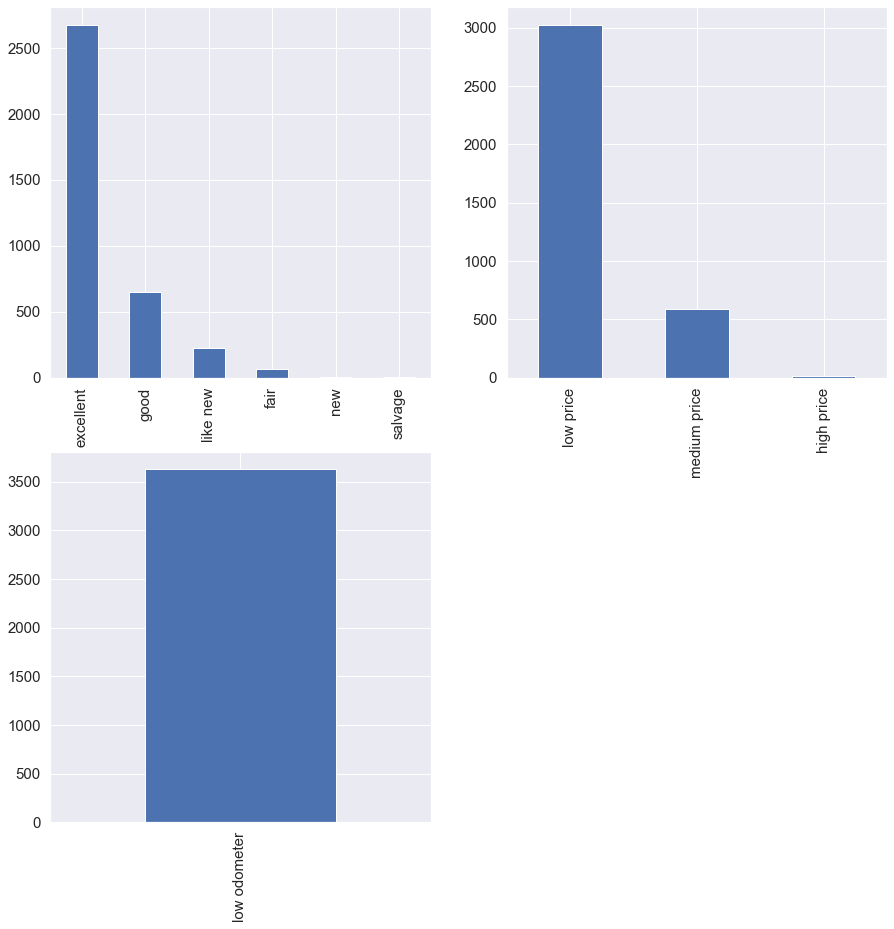

In [111]:
price_model_20('accord')
model_20('accord')

# Frequentist Inference & Descriptive Stats Practice
## Numerical Variable Analysis (year, odometer)

In [114]:
from numpy.polynomial.polynomial import polyfit
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import statsmodels.stats.weightstats

In [115]:
ford_price_20=data_20[data_20['manufacturer']=='ford']
ford_price_20.head(5)

id          region  price  year manufacturer              model  \
1   7034440610  salt lake city      0  2016         ford              f-150   
3   7034440546  salt lake city      0  2016         ford              f-150   
6   7034405619  salt lake city  34500  2017         ford              f-350   
8   7034404595  salt lake city  12500  2013         ford              f-250   
22  7034366554  salt lake city   9500  2001         ford  excursion limited   

    condition       odometer title_status transmission drive paint_color  \
1   excellent      10.000000        clean    automatic   4wd     unknown   
3   excellent      10.000000        clean    automatic   4wd     unknown   
6   excellent   95484.000000        clean    automatic   4wd       white   
8   excellent  226031.000000        clean    automatic   4wd       white   
22       good  101729.961515        clean    automatic   4wd        grey   

   odometer_class price_class  age  
1    low odometer   low price    4  
3    low odometer   low price    4  
6    low odometer  high price    3  
8    low odometer   low price    7  
22   low odometer   low price   19

In [117]:
#create a histogram function
def price_his(name):
    data=data_20[data_20['manufacturer']==name]['price']
    plt.figure(figsize=(10,8))
    sns.distplot(data,bins=10)
    plt.xlabel('price')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)
    print(data.describe())

In [118]:
def age_his(name):
    data=data_20[data_20['manufacturer']==name]['age']
    plt.figure(figsize=(10,8))
    sns.distplot(data,bins=10)
    plt.xlabel('age')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)
    print(data.describe())
    

count    80271.000000
mean     13008.647905
std       9864.929542
min          0.000000
25%       4995.000000
50%      10999.000000
75%      19500.000000
max      38895.000000
Name: price, dtype: float64


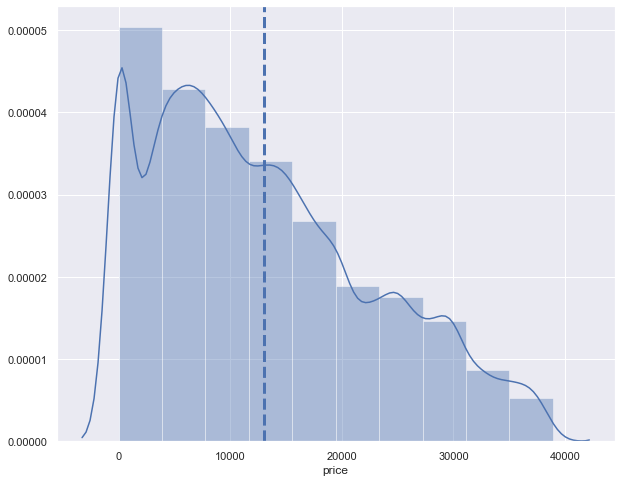

In [119]:
price_his('ford')

count    80271.000000
mean         8.735783
std          4.687479
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         19.000000
Name: age, dtype: float64


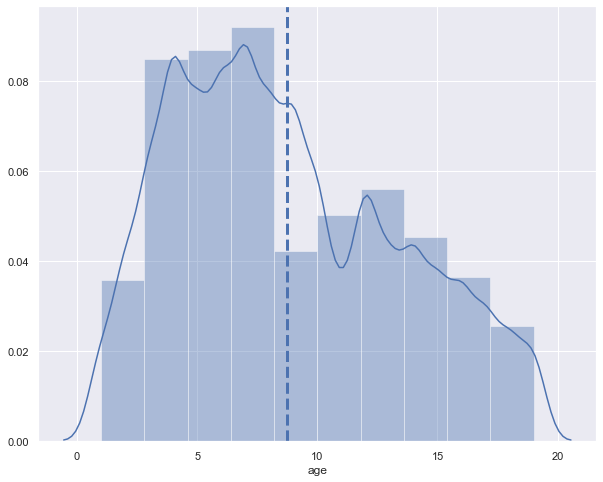

In [120]:
age_his('ford')

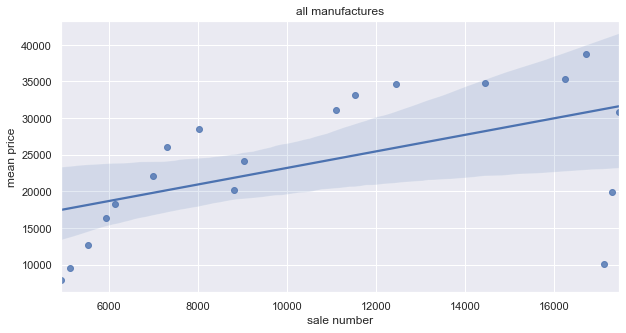

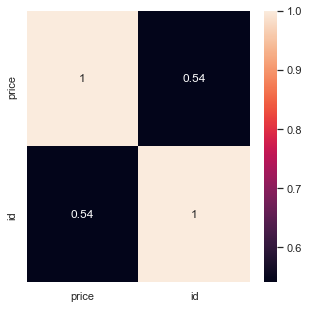

In [121]:
sn=data_20.groupby('year').id.count()
price=data_20.groupby('year').price.mean()
all=pd.concat([price,sn],axis=1)

plt.figure(figsize=(10,5))
    

_=sns.regplot(y=all.id, x=all.price, data=all, fit_reg = True)
_ = plt.xlabel('sale number')
_ = plt.ylabel('mean price')
_ =plt.title('all manufactures')

plt.figure(figsize=(5,5))
corrmatrix=all.corr()
sns.heatmap(corrmatrix, annot=True)

In [150]:
#create a scatter function
def price_year_ecdf(name):
    data=data_20[data_20['manufacturer']==name].groupby('year').price.mean()
    x=data.index
    y=np.sort(data)
    return x,y

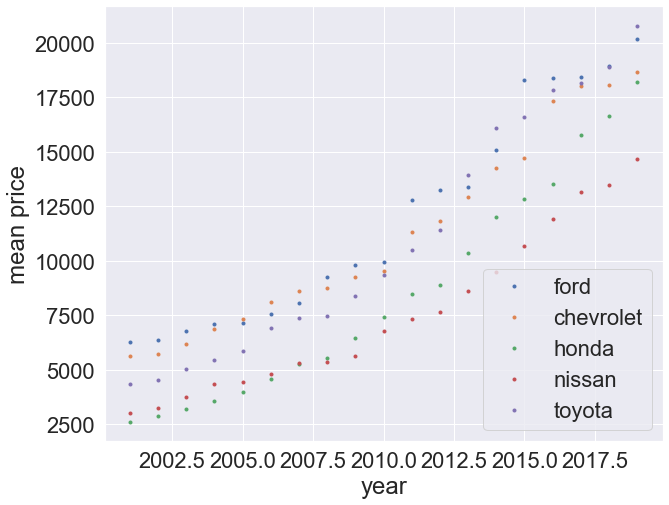

In [151]:
x_ford,y_ford= price_year_ecdf('ford')
x_chevrolet,y_chevrolet= price_year_ecdf('chevrolet')
x_honda,y_honda= price_year_ecdf('honda')
x_nissan,y_nissan= price_year_ecdf('nissan')
x_toyota,y_toyota= price_year_ecdf('toyota')

plt.figure(figsize=(10,8))
_=plt.plot(x_ford,y_ford,marker='.',linestyle='none')
_=plt.plot(x_chevrolet,y_chevrolet,marker='.',linestyle='none')
_=plt.plot(x_honda,y_honda,marker='.',linestyle='none')
_=plt.plot(x_nissan,y_nissan,marker='.',linestyle='none')
_=plt.plot(x_toyota,y_toyota,marker='.',linestyle='none')

plt.legend(('ford', 'chevrolet', 'honda','nissan','toyota'), loc='lower right')
_ = plt.xlabel('year')
_ = plt.ylabel('mean price')

In [152]:
x_ford,y_ford= price_year_ecdf('ford')
slope,intercept=np.polyfit(x_ford,y_ford,1)
slope,intercept

(855.8382801905633, -1708285.2587943515)

In [153]:
x=x_ford
y=slope*x+intercept

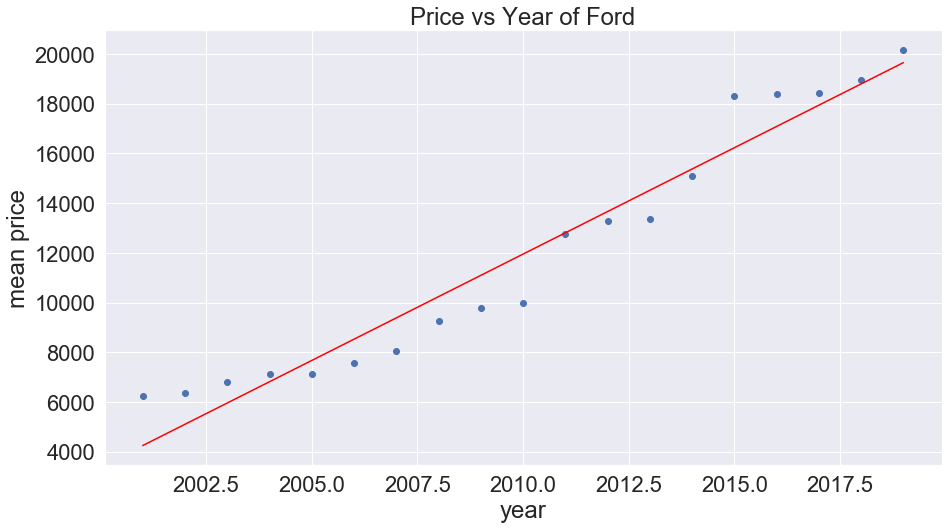

In [154]:
plt.figure(figsize=(15,8))
sns.set(font_scale=2)
_=plt.scatter(x_ford,y_ford)
_=plt.plot(x, y, linestyle='-',color='red')
_ = plt.xlabel('year')
_ = plt.ylabel('mean price')
_ = plt.title('Price vs Year of Ford')
plt.show()


### generate pearson value

In [155]:
#check pearson_r
#check price and year
def pearson_r(x, y):
    corr_mat=np.corrcoef(x,y)
    return corr_mat[0,1]
ford_r=pearson_r(ford_price_20['year'],ford_price_20['price'])
ford_r

0.43069390567438676

##### conclusion: price and year has a linear correlation

### Odometer and year

In [156]:
def year_odometer(name):
    data=data_20[data_20['manufacturer']==name].groupby('age').odometer.mean()
    x=data.index
    y=np.sort(data)
    return x,y

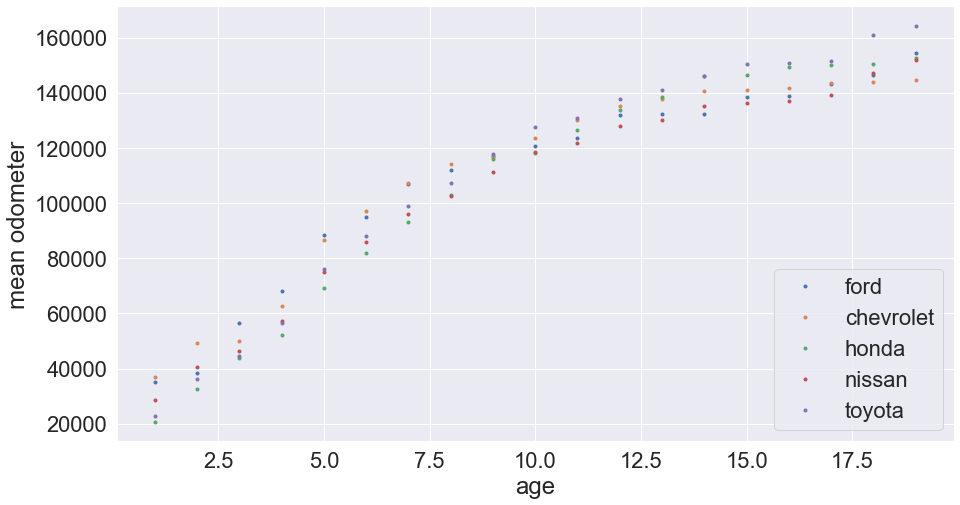

In [334]:
x_ford,y_ford= year_odometer('ford')
x_chevrolet,y_chevrolet= year_odometer('chevrolet')
x_honda,y_honda= year_odometer('honda')
x_nissan,y_nissan= year_odometer('nissan')
x_toyota,y_toyota= year_odometer('toyota')

plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
_=plt.plot(x_ford,y_ford,marker='.',linestyle='none')
_=plt.plot(x_chevrolet,y_chevrolet,marker='.',linestyle='none')
_=plt.plot(x_honda,y_honda,marker='.',linestyle='none')
_=plt.plot(x_nissan,y_nissan,marker='.',linestyle='none')
_=plt.plot(x_toyota,y_toyota,marker='.',linestyle='none')

plt.legend(('ford', 'chevrolet', 'honda','nissan','toyota'), loc='lower right')
_ = plt.xlabel('age')
_ = plt.ylabel('mean odometer')

### pearson value of price and odometer 

In [161]:
#check pearson_r
#check price and odomater
ford_r=pearson_r(ford_price_20['odometer'],ford_price_20['price'])
ford_r

-0.18652267106405432

##### conclusion: price and odometer  have non-linear correlation

In [162]:
def corrmatrix(name):
    data=data_20[data_20['manufacturer']==name]
    corrmatrix=data.corr()
    sns.heatmap(corrmatrix, annot=True)
    plt.show()

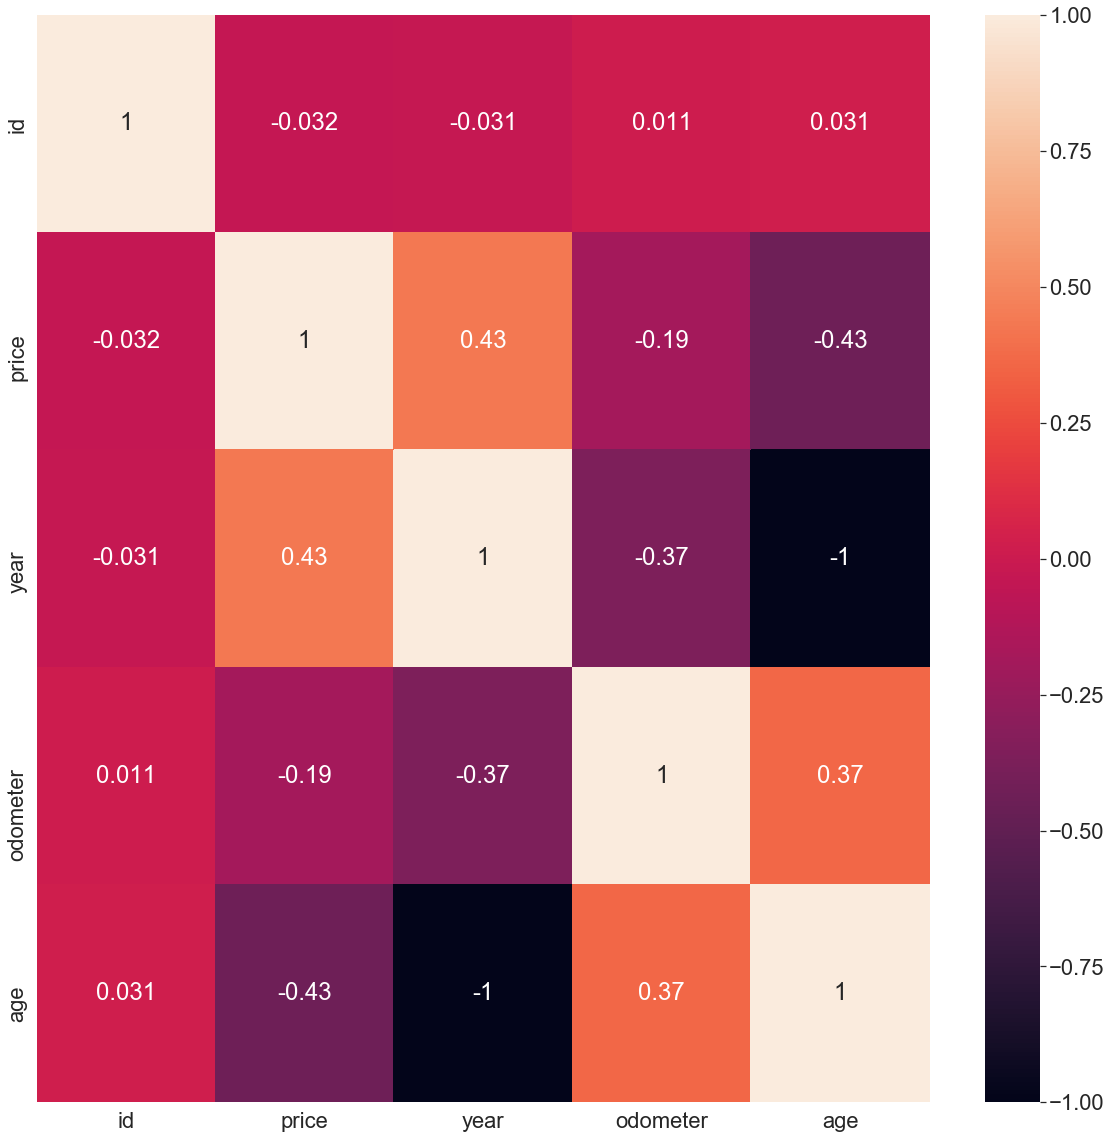

In [163]:
corrmatrix('ford')

## Categorical Variable Analysis (paint_color, model, condition, drive)

In [164]:
def categorical_var(name):
    data=data_20[data_20['manufacturer']==name]
    
    plt.figure(figsize=(16,8))
    sns.set(font_scale=2)
    sns.boxplot(x='paint_color', y='price', data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='condition', y='price', data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='drive', y='price',data=data)
    
    plt.figure(figsize=(10,8))
    sns.set(font_scale=2)
    sns.boxplot(x='title_status', y='price', data=data)

    

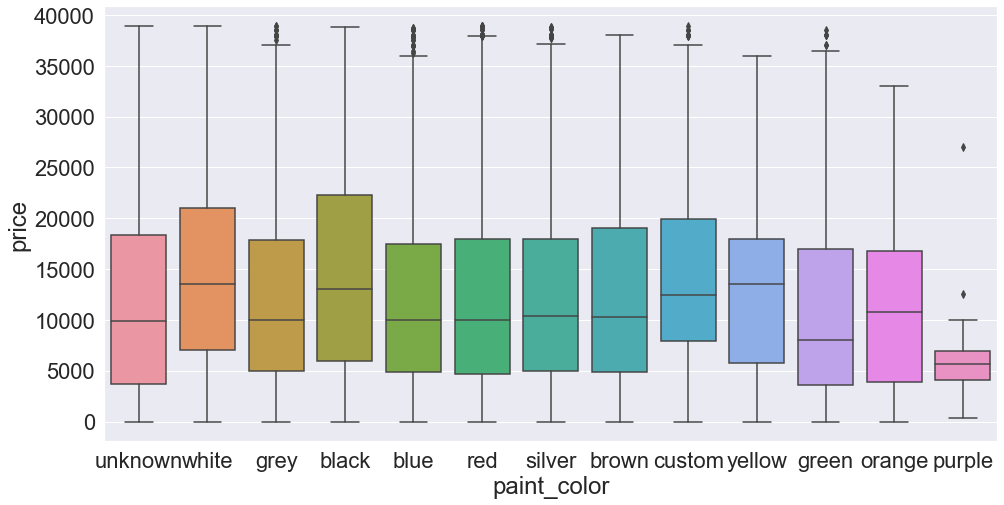

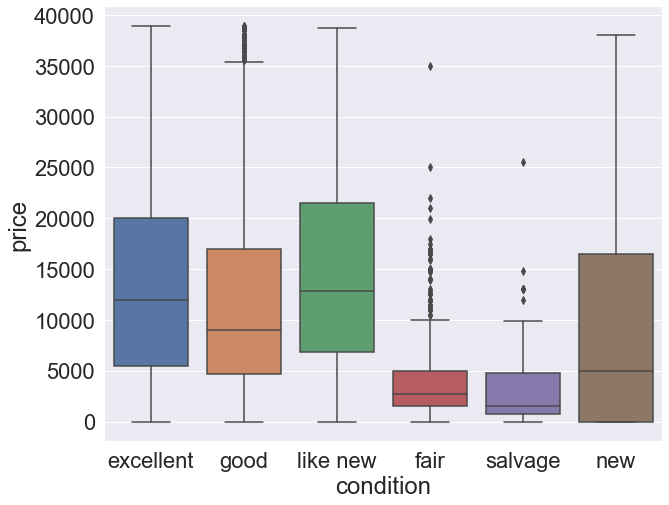

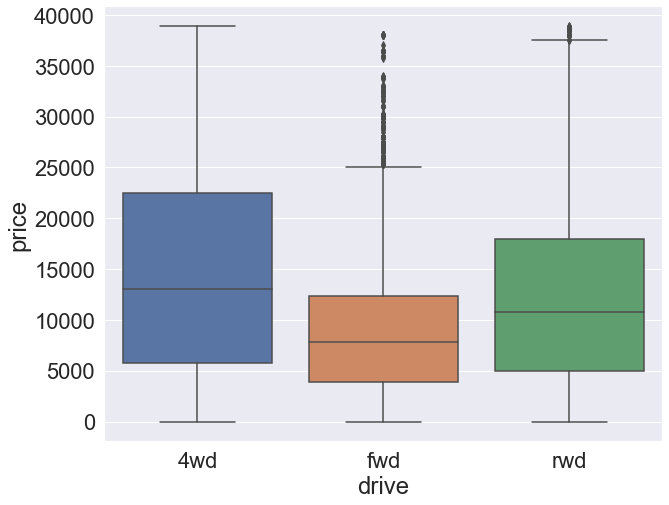

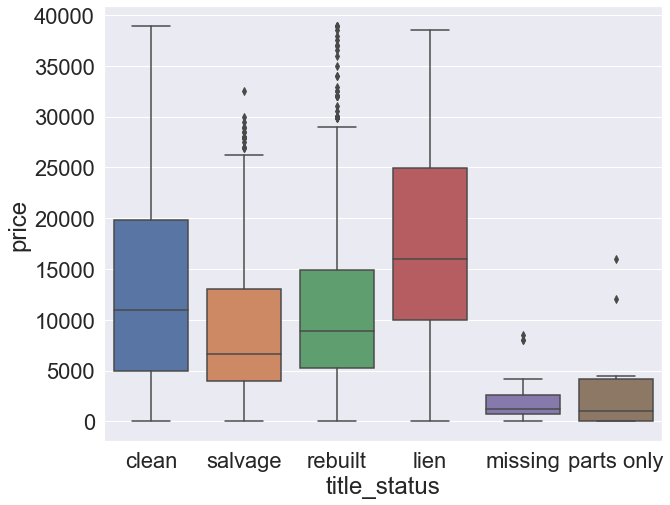

In [165]:
categorical_var('ford')

### compute confidence interval

In [166]:
#price histogram
def plot_distribution(name):
    sns.boxplot(x='manufacturer', y='price', data=data_20[data_20['manufacturer']==name])
    data=data_20[data_20['manufacturer']==name]['price']
    plt.figure()
    sns.distplot(data,bins=10)
    plt.xlabel('price')
    plt.axvline(np.mean(data),color='b',linestyle='dashed',linewidth=3)

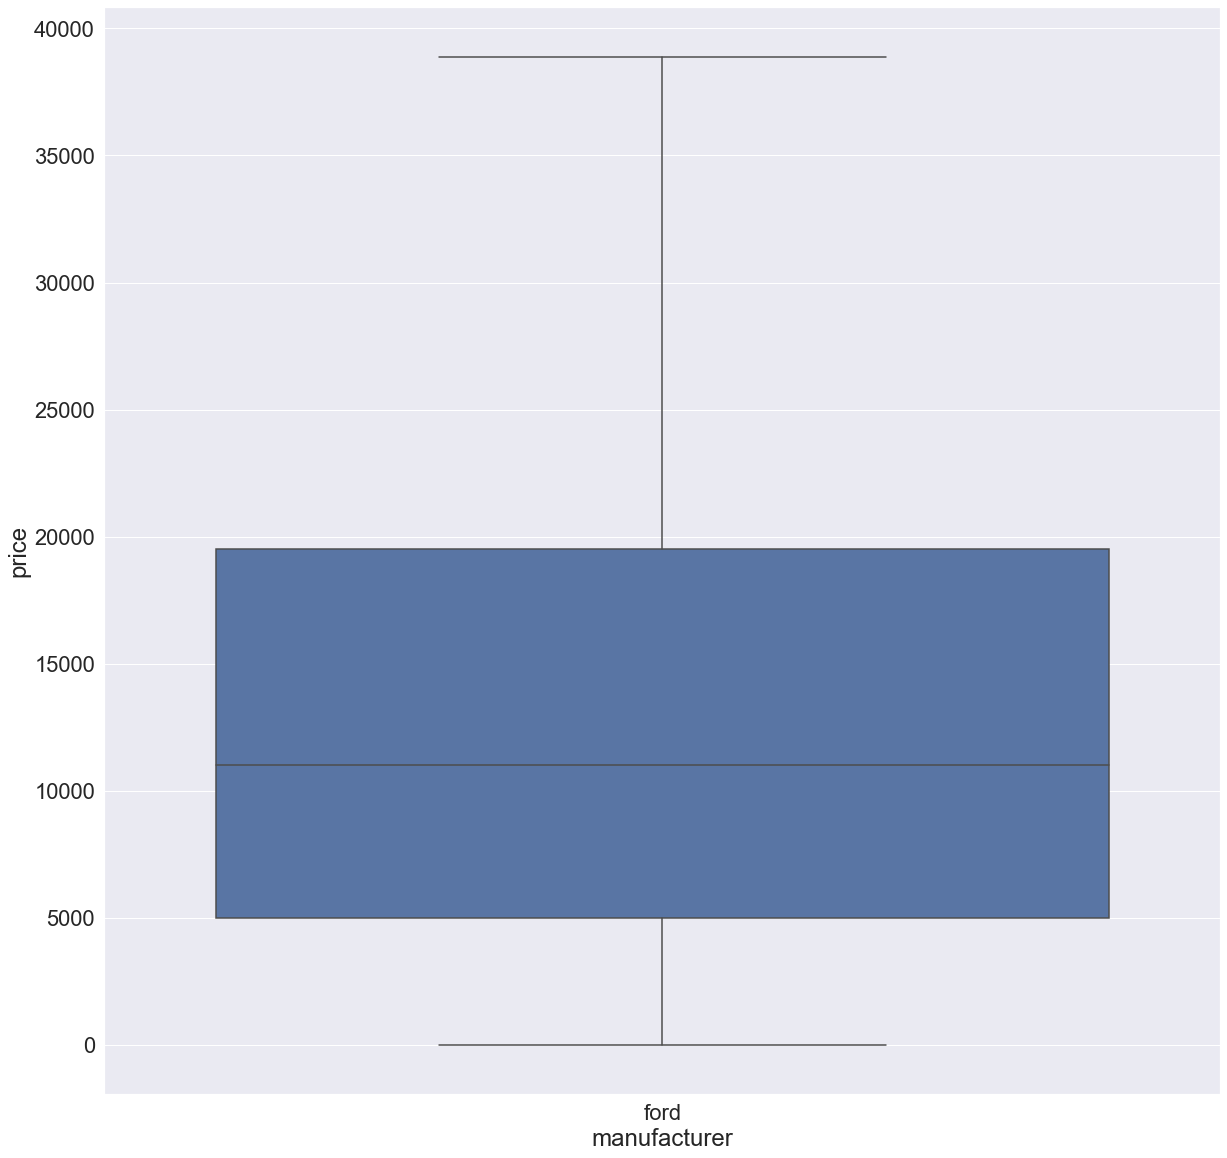

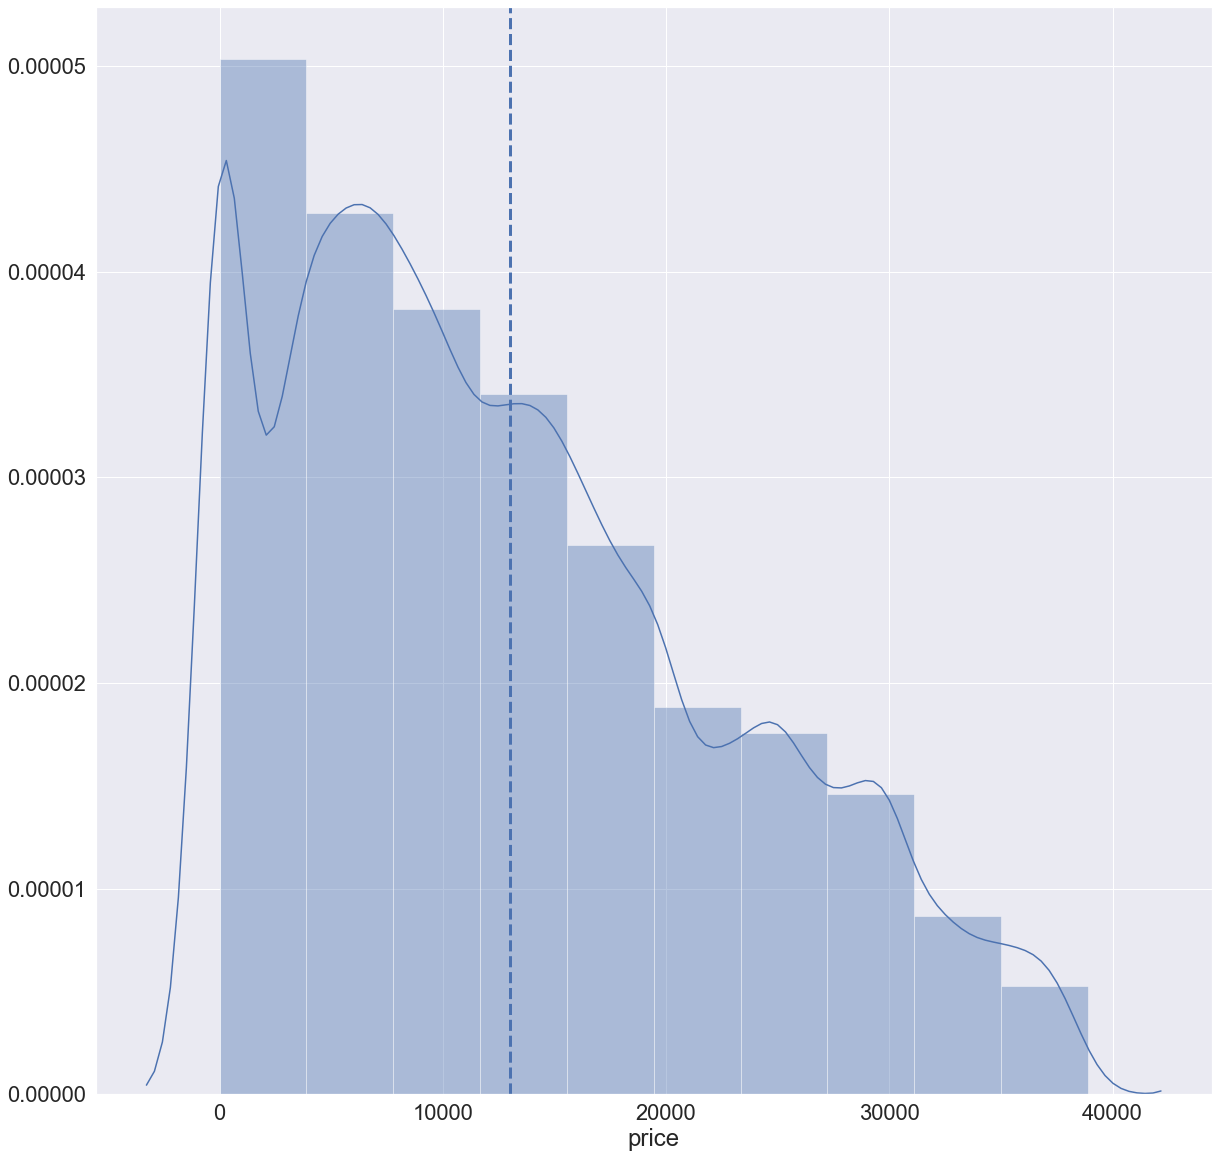

In [167]:
plot_distribution('ford')

In [168]:
#create a sampling function
def price_sampler(n):
    return np.random.choice(ford_price_20['price'], n)

In [169]:
sample_size=50
df = sample_size-1

In [170]:
#ford sample
seed(47)
ford_sample = price_sampler(sample_size)
ford_sample

array([28990, 13000, 24950,  7200,  7795,     0,  7950, 22700,  5100,
       14500, 14990, 24900,  4950, 16995,  2200, 19985,  8990, 31000,
       17995,  5500, 34995, 12995,  9995, 12995, 30000,  8995, 29995,
       11999,  8995, 11900,  3000, 12999,     0,  7499, 10988,     0,
       11995, 27800, 16890,  1975, 19100, 21000, 22950, 27900, 33990,
       14250, 19999,   500,  5950,  9000], dtype=int64)

In [171]:
#sample mean
mean_ford_20=ford_sample.mean()
mean_ford_20

14406.78

In [172]:
#sample std
std_ford_20=ford_sample.std(ddof=df)
print(std_ford_20)

67792.59749102405


In [173]:
#compute the confidence interval by manual
t_ford = t(df).ppf([0.025, 0.975])
t_ford * std_ford_20 / np.sqrt(sample_size) + mean_ford_20

array([-4859.66300753, 33673.22300753])

In [174]:
t2=t.ppf(0.95, df)

### Hypothesis Testing

In [175]:
# compare color histogram
def compare_colorhist_distribution(c1,c2):
    data1=ford_price_20[ford_price_20['paint_color']==c1]['price']
    data2=ford_price_20[ford_price_20['paint_color']==c2]['price']
    plt.figure(figsize=(14,8))
    sns.set(font_scale=2)
    ax1=sns.distplot(data1,bins=10)
    ax2=sns.distplot(data2,bins=10)
    plt.axvline(np.mean(data1),color='b',linestyle='dashed',linewidth=3)
    plt.axvline(np.mean(data2),color='orange',linestyle='dashed',linewidth=3)
    plt.title('mean price of different colors distribution')

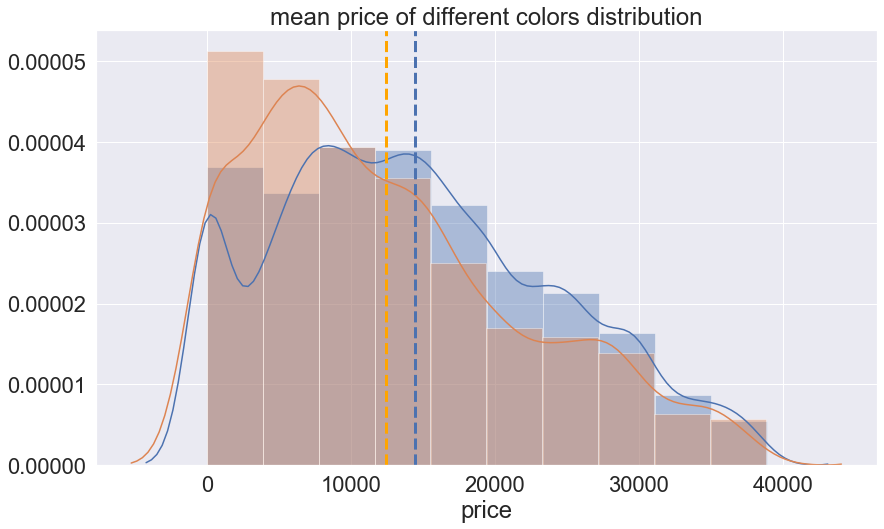

In [176]:
compare_colorhist_distribution('white','silver')

In [177]:
# compare cmodel histogram
def compare_modelhist_distribution(m1,m2):
    data1=ford_price_20[ford_price_20['model']==m1]['price']
    data2=ford_price_20[ford_price_20['model']==m2]['price']
    plt.figure(figsize=(14,8))
    sns.set(font_scale=2)
    ax1=sns.distplot(data1,bins=10)
    ax2=sns.distplot(data2,bins=10)
    plt.axvline(np.mean(data1),color='b',linestyle='dashed',linewidth=3)
    plt.axvline(np.mean(data2),color='orange',linestyle='dashed',linewidth=3)

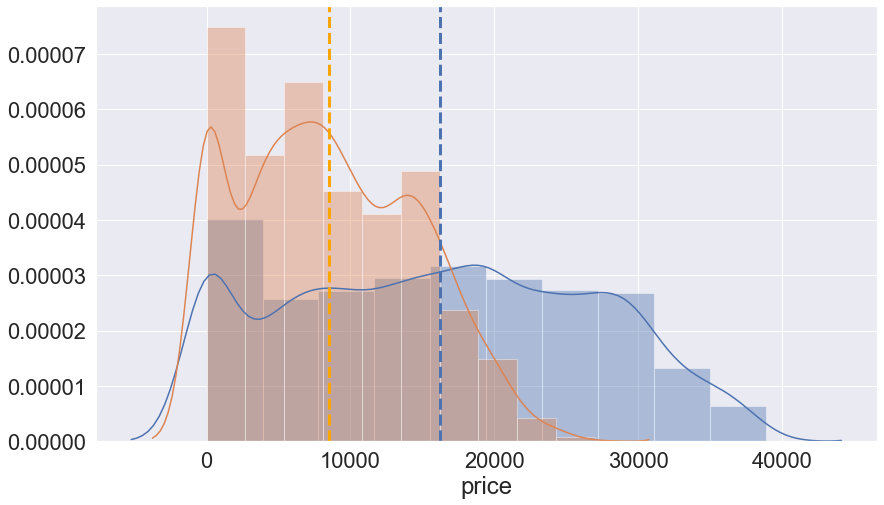

In [178]:
compare_modelhist_distribution('f-150','escape')

In [179]:
#H0: different colors share the same mean price
#compute the P-value by t test
def compare_color_groups(c1,c2,alpha,ss):
    data1=np.random.choice(ford_price_20[ford_price_20['paint_color']==c1]['price'],ss)
    data2=np.random.choice(ford_price_20[ford_price_20['paint_color']==c2]['price'],ss)
    t, pval=sts.ttest_ind(data1,data2,equal_var=False)
    print('p-value is %.3f'%(pval))
    if pval>alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [180]:
compare_color_groups('white','silver',0.05,15)

p-value is 0.606
fail to reject H0


In [181]:
compare_color_groups('white','red',0.05,15)

p-value is 0.245
fail to reject H0


In [182]:
#H0: different models have the same mean price
#compute the P-value by t test
def compare_model_groups(m1,m2,alpha,ss):
    data1=np.random.choice(ford_price_20[ford_price_20['model']==m1]['price'],ss)
    data2=np.random.choice(ford_price_20[ford_price_20['model']==m2]['price'],ss)
    t, pval=sts.ttest_ind(data1,data2,equal_var=False)
    print('p-value is %.3f'%(pval))
    if pval>alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [183]:
compare_model_groups('f-150','escape',0.05,15)

p-value is 0.022
reject H0


In [184]:
compare_model_groups('f-150','focus',0.05,15)

p-value is 0.001
reject H0


# Modeling

In [185]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules

In [186]:
data_learn=data_20[['price','manufacturer','odometer','year','condition','drive','paint_color','title_status']]

<Figure size 1008x1008 with 0 Axes>

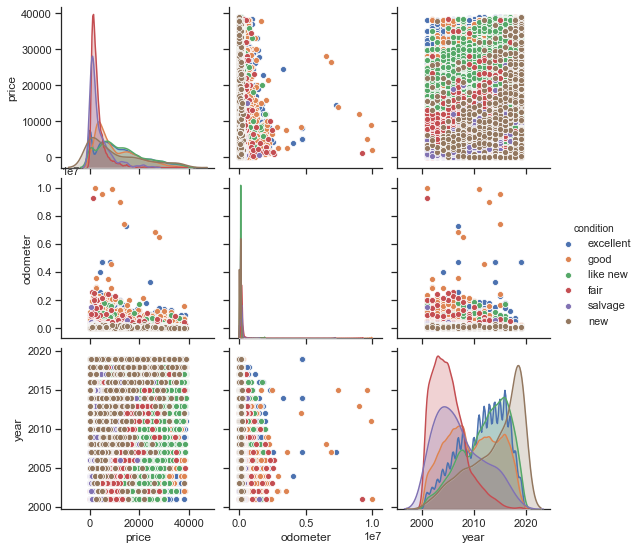

In [187]:
#check the relationship between the variables
plt.figure(figsize=(14,14))
sns.set(font_scale=2)
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_learn, hue="condition")

In [188]:
data_learn.head(5)

price manufacturer  odometer  year  condition drive paint_color  \
0  17899   volkswagen   63500.0  2012  excellent   4wd       black   
1      0         ford      10.0  2016  excellent   4wd     unknown   
3      0         ford      10.0  2016  excellent   4wd     unknown   
5  13999          ram  120057.0  2009  excellent   4wd      silver   
6  34500         ford   95484.0  2017  excellent   4wd       white   

  title_status  
0        clean  
1        clean  
3        clean  
5        clean  
6        clean

In [189]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454549 entries, 0 to 509576
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         454549 non-null  int64  
 1   manufacturer  454549 non-null  object 
 2   odometer      454549 non-null  float64
 3   year          454549 non-null  int32  
 4   condition     454549 non-null  object 
 5   drive         454549 non-null  object 
 6   paint_color   454549 non-null  object 
 7   title_status  454549 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 49.5+ MB


## Variables Label Encoding

In [190]:
# mannual label encoding
data_learn['condition'].value_counts()

excellent    338452
good          83661
like new      25474
fair           5526
new             993
salvage         443
Name: condition, dtype: int64

In [191]:
data_learn['title_status'].value_counts()

clean         437097
rebuilt         9895
salvage         4793
lien            2495
missing          140
parts only       129
Name: title_status, dtype: int64

In [192]:
data_learn['condition'].replace('like new',5,inplace=True)
data_learn['condition'].replace('excellent',4,inplace=True)
data_learn['condition'].replace('good',3,inplace=True)
data_learn['condition'].replace('new',2,inplace=True)
data_learn['condition'].replace('fair',1,inplace=True)
data_learn['condition'].replace('salvage',0,inplace=True)

C:\Users\FYsophia\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [193]:
data_learn['title_status'].replace('lien',5,inplace=True)
data_learn['title_status'].replace('clean',4,inplace=True)
data_learn['title_status'].replace('rebuilt',3,inplace=True)
data_learn['title_status'].replace('salvage',2,inplace=True)
data_learn['title_status'].replace('missing',1,inplace=True)
data_learn['title_status'].replace('parts only',0,inplace=True)

In [194]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [195]:
# Categorical Variables Label Encoding
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data_learn['manufacturer']= label_encoder.fit_transform(data_learn['manufacturer']) 
data_learn['condition']= label_encoder.fit_transform(data_learn['condition']) 
data_learn['drive']= label_encoder.fit_transform(data_learn['drive']) 
data_learn['title_status']= label_encoder.fit_transform(data_learn['title_status']) 
data_learn['paint_color']= label_encoder.fit_transform(data_learn['paint_color']) 
data_learn.head()

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

price  manufacturer  odometer  year  condition  drive  paint_color  \
0  17899            40   63500.0  2012          4      0            0   
1      0            12      10.0  2016          4      0           10   
3      0            12      10.0  2016          4      0           10   
5  13999            33  120057.0  2009          4      0            9   
6  34500            12   95484.0  2017          4      0           11   

   title_status  
0             4  
1             4  
3             4  
5             4  
6             4

## Dummy Regressor

In [370]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score

In [371]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [372]:
dumr = DummyRegressor()

In [373]:
X_train_dumr, X_test_dumr,y_train_dumr, y_test_dumr=train_test_split(X,y,train_size=0.5, random_state=42)

In [374]:
dumr.fit(X_train_dumr, y_train_dumr)
y_predict_dumr=dumr.predict(X_test_dumr)

In [375]:
#calculate the RMSE of Training set
test_rmse_dumr = np.sqrt(MSE(y_test_dumr, y_predict_dumr))

print("Dummy Regression RMSE = {:.2f}".format(test_rmse_dumr))
train_rmse_dumr = np.sqrt(MSE(y_train_dumr, y_predict_dumr[1:]))
print("Dummy Regression RMSE = {:.2f}".format(train_rmse_dumr))

Dummy Regression RMSE = 9303.15
Dummy Regression RMSE = 9298.73


In [376]:
# r square
r2_test_dumr=r2_score(y_test_dumr, y_predict_dumr)
r2_train_dumr=r2_score(y_train_dumr, y_predict_dumr[1:])

## Linear Regression

In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [378]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [379]:
X_train_lr, X_test_lr,y_train_lr, y_test_lr=train_test_split(X,y,train_size=0.5, random_state=42)

In [380]:
lingr = LinearRegression()

In [381]:
lingr.fit(X_train_lr, y_train_lr)
y_predict_lr=lingr.predict(X_test_lr)

In [382]:
#calculate the RMSE of Training set
test_rmse_lr = np.sqrt(MSE(y_test_lr, y_predict_lr))

print("linear Regression RMSE = {:.2f}".format(test_rmse_lr))
train_rmse_lr = np.sqrt(MSE(y_train_lr, y_predict_lr[1:]))
print("linear Regression RMSE = {:.2f}".format(train_rmse_lr))

linear Regression RMSE = 8268.33
linear Regression RMSE = 10263.76


In [383]:
#  goodness of fit
r2_test_lr=r2_score(y_test_lr, y_predict_lr)
r2_train_lr=r2_score(y_train_lr, y_predict_lr[1:])

## Random Forest Regressor

In [384]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [385]:
#sample for random Forest Feature S
data_learn_sample=data_learn.sample(n=2000)

In [386]:
y2= data_learn_sample.price
X2= data_learn_sample.drop('price',axis=1)

In [387]:
X_train_rf, X_test_rf,y_train_rf, y_test_rf=train_test_split(X2,y2,train_size=0.5, random_state=42)

In [388]:
#compare the sensitivity of features
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, n_jobs=1))
sel.fit(X_train_rf, y_train_rf)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
     

In [399]:
sel.get_support()

array([ True,  True,  True, False, False, False, False])

In [412]:
regressor = RandomForestRegressor()

In [413]:
y= data_learn.price
X= data_learn.drop('price',axis=1)

In [417]:
X_train_rf, X_test_rf,y_train_rf, y_test_rf=train_test_split(X,y,train_size=0.5, random_state=42)

In [419]:
regressor.fit(X_train_rf, y_train_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [420]:
y_predict_rf = lingr.predict(X_test_rf)

In [421]:
#calculate the RMSE of Testing set
test_rmse_rf= np.sqrt(MSE(y_test_rf , y_predict_rf))
print("Random Forrest RMSE= {:.2f}".format(test_rmse_rf))
train_rmse_rf = np.sqrt(MSE(y_train_rf, y_predict_rf[1:]))
print("Random Forrest RMSE = {:.2f}".format(train_rmse_rf))

Random Forrest RMSE= 8268.33
Random Forrest RMSE = 10263.76


In [422]:
#  goodness of fit
r2_test_rf=r2_score(y_test_rf, y_predict_rf)
r2_train_rf=r2_score(y_train_rf, y_predict_rf[1:])

## GradientBoostingRegressor

In [425]:
from sklearn.ensemble import GradientBoostingRegressor

In [426]:
X_train_gbr, X_test_gbr,y_train_gbr, y_test_gbr=train_test_split(X,y,train_size=0.5, random_state=42)

In [427]:
grabr=GradientBoostingRegressor()

In [430]:
grabr.fit(X_train_gbr, y_train_gbr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [436]:
#use GridSearchCV to tune models
parameters_grid= {'n_estimators':[50,100,500,1000],
                  'max_features':[0.5,0.75],
                  'max_depth':[3,4,5]}
model=GridSearchCV(grabr,param_grid=parameters_grid,cv=5)
model.fit(X_train_gbr,y_train_gbr)
print('model.best_score_:: ',model.best_score_)
print('model.best_params_::  ',model.best_params_)


model.best_score_::  0.46072195619323303
model.best_params_::   {'max_depth': 5, 'max_features': 0.75, 'n_estimators': 1000}


In [437]:
print('bets score of model：{:.3f}'.format(model.score(X_test_gbr, y_test_gbr)))

bets score of model：0.462


In [441]:
grabr_2=GradientBoostingRegressor(max_depth=5,max_features=0.75,n_estimators=1000)

In [442]:
grabr_2.fit(X_train_gbr, y_train_gbr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=0.75, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [443]:
y_predict_gbr = grabr_2.predict(X_test_gbr)

In [444]:
#calculate the RMSE of Testing set
test_rmse_gbr= np.sqrt(MSE(y_test_gbr , y_predict_gbr))
print("gbr RMSE= {:.2f}".format(test_rmse_gbr))
train_rmse_gbr = np.sqrt(MSE(y_train_gbr, y_predict_gbr[1:]))
print("gbr RMSE = {:.2f}".format(train_rmse_gbr))

gbr RMSE= 6824.40
gbr RMSE = 11125.69


In [445]:
#  goodness of fit
r2_test_gbr=r2_score(y_test_gbr, y_predict_gbr)
r2_train_gbr=r2_score(y_train_gbr, y_predict_gbr[1:])

## KNN Regressor

In [446]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [447]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn=train_test_split(X,y,train_size=0.2, random_state=42)

In [448]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_train_df_knn = pd.DataFrame(X_train_scaled_knn)

X_test_scaled_knn = scaler.fit_transform(X_test_knn)
X_test_df_knn = pd.DataFrame(X_test_scaled_knn )

In [449]:
rmse_val = []
for K in range(20):
    K += 1
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN.fit(X_train_df_knn, y_train_knn)  #fit the model
    y_predict_knn=KNN.predict(X_test_df_knn) #make prediction on test set
    error = sqrt(mean_squared_error(y_test_knn, y_predict_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error )
   

RMSE value for k=  1 is: 9662.85600009473
RMSE value for k=  2 is: 8615.57495152452
RMSE value for k=  3 is: 8190.845957356355
RMSE value for k=  4 is: 7976.055758428603
RMSE value for k=  5 is: 7829.3339004740865
RMSE value for k=  6 is: 7731.252171251645
RMSE value for k=  7 is: 7652.268434410216
RMSE value for k=  8 is: 7613.915687303486
RMSE value for k=  9 is: 7585.400125956166
RMSE value for k=  10 is: 7568.534605931373
RMSE value for k=  11 is: 7545.597149121352
RMSE value for k=  12 is: 7537.591852246207
RMSE value for k=  13 is: 7521.0742553599
RMSE value for k=  14 is: 7515.485001885506
RMSE value for k=  15 is: 7508.110542116773
RMSE value for k=  16 is: 7502.88247156404
RMSE value for k=  17 is: 7500.331019075506
RMSE value for k=  18 is: 7491.676012178982
RMSE value for k=  19 is: 7486.374204582026
RMSE value for k=  20 is: 7489.129476577457


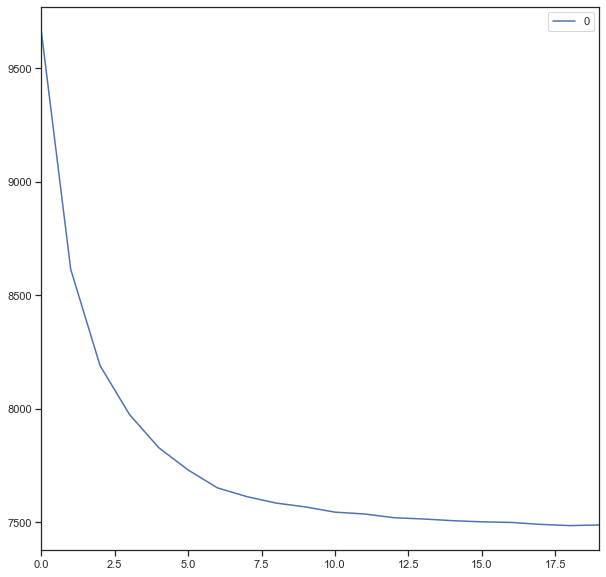

In [455]:
#rmse values against k values

curve = pd.DataFrame(rmse_val) 
curve.plot(figsize=(10,10))

as is shown in the plot, 3 is the best predictors in terms of errors

In [456]:
X_train_knn, X_test_knn,y_train_knn, y_test_knn=train_test_split(X,y,train_size=0.5, random_state=42)

In [457]:
knn =neighbors.KNeighborsRegressor(n_neighbors = 3)

In [458]:
knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [459]:
y_predict_knn = knn.predict(X_test_knn)

In [460]:
test_rmse_knn= np.sqrt(MSE(y_test_knn , y_predict_knn))
print("KNN RMSE= {:.2f}".format(test_rmse_knn))
train_rmse_knn = np.sqrt(MSE(y_train_knn, y_predict_knn[1:]))
print("KNN RMSE = {:.2f}".format(train_rmse_knn))

KNN RMSE= 7827.20
KNN RMSE = 12014.92


In [461]:
r2_test_knn=r2_score(y_test_knn, y_predict_knn)
r2_train_knn=r2_score(y_train_knn, y_predict_knn[1:])

# compare the models

In [462]:
r2_train=[r2_train_dumr,r2_train_lr,r2_train_rf,r2_train_gbr,r2_train_knn]
r2_test=[r2_test_dumr,r2_test_lr,r2_test_rf,r2_test_gbr,r2_test_knn]
rmse_train=[train_rmse_dumr,train_rmse_lr,train_rmse_rf,train_rmse_gbr,train_rmse_knn]
rmse_test=[test_rmse_dumr,test_rmse_lr,test_rmse_rf,test_rmse_gbr,test_rmse_knn]

In [463]:
models = pd.DataFrame({
    'Model': ['Dummy Regressor','Linear Regression', 'Random Forest Regressor', 'GradientBoostingRegressor', 'KNN'],
    
    'r2_train':r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test})

In [464]:
pd.options.display.float_format = '{:,.2f}'.format

In [465]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


Model  r2_train  r2_test  rmse_train  rmse_test
3  GradientBoostingRegressor     -0.43     0.46   11,125.69   6,824.40
4                        KNN     -0.67     0.29   12,014.92   7,827.20
1          Linear Regression     -0.22     0.21   10,263.76   8,268.33
2    Random Forest Regressor     -0.22     0.21   10,263.76   8,268.33
0            Dummy Regressor      0.00    -0.00    9,298.73   9,303.15

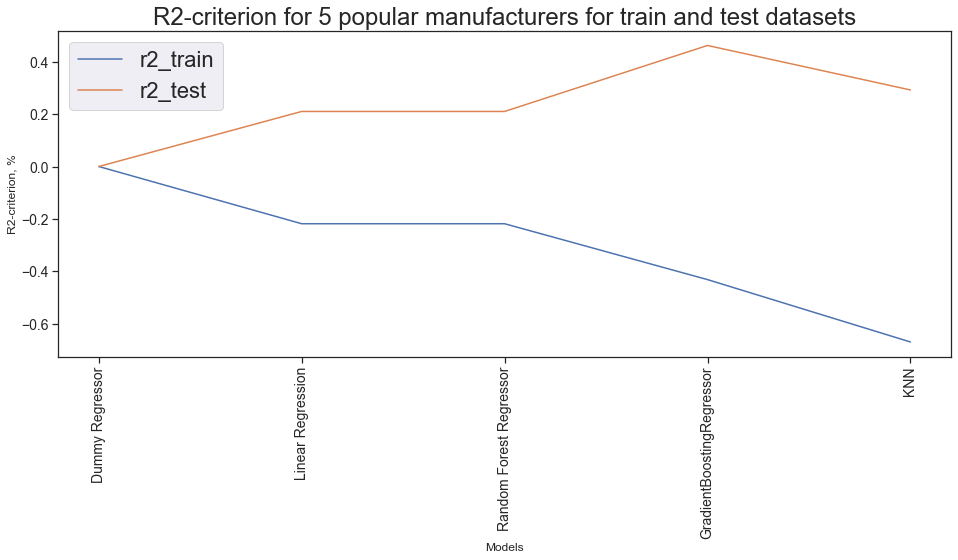

In [466]:
# Plot
plt.figure(figsize=[16,6])
xx = models['Model']
plt.tick_params(labelsize=14)
sns.set(font_scale=2)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 5 popular manufacturers for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

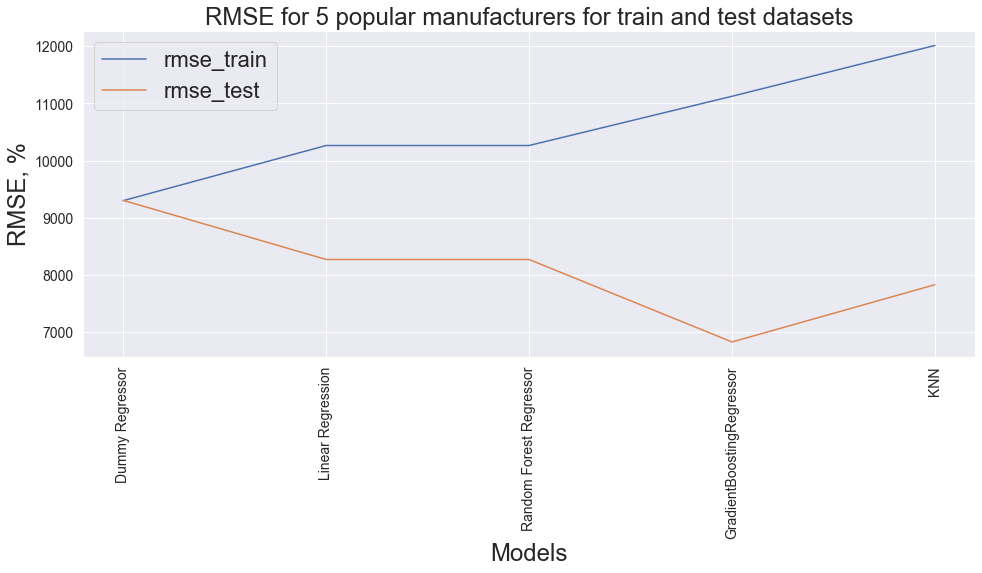

In [467]:
# Plot
plt.figure(figsize=[16,6])
sns.set(font_scale=2)
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 5 popular manufacturers for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

## Thus, the best models by the RMSE is Gradient Boosting Regression